In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
# Función para visualizar un conjunto de datos en 2D
def plot_data(X, y, size=None):
    y_unique = np.unique(y)
    colors = pl.cm.rainbow(np.linspace(0.0, 1.0, y_unique.size))
    for this_y, color in zip(y_unique, colors):
        this_X = X[y == this_y]
        pl.scatter(this_X[:, 0], this_X[:, 1],  c=color,
                    alpha=0.5, edgecolor='k', s=size,
                    label="Class %s" % this_y)
    pl.legend(loc="best")
    pl.title("Data")
    
# Función para visualizar de la superficie de decisión de un clasificador
def plot_decision_region(X, pred_fun):
    min_x = np.min(X[:, 0])
    max_x = np.max(X[:, 0])
    min_y = np.min(X[:, 1])
    max_y = np.max(X[:, 1])
    min_x = min_x - (max_x - min_x) * 0.05
    max_x = max_x + (max_x - min_x) * 0.05
    min_y = min_y - (max_y - min_y) * 0.05
    max_y = max_y + (max_y - min_y) * 0.05
    x_vals = np.linspace(min_x, max_x, 100)
    y_vals = np.linspace(min_y, max_y, 100)
    XX, YY = np.meshgrid(x_vals, y_vals)
    grid_r, grid_c = XX.shape
    ZZ = np.zeros((grid_r, grid_c))
    for i in range(grid_r):
        for j in range(grid_c):
            ZZ[i, j] = pred_fun(XX[i, j], YY[i, j])
    pl.contourf(XX, YY, ZZ, 100, cmap = pl.cm.coolwarm, vmin= -1, vmax=2)
    pl.colorbar()
    pl.xlabel("x")
    pl.ylabel("y")
    
def gen_pred_fun(clf):
    def pred_fun(x1, x2):
        x = np.array([[x1, x2]])
        return clf.predict(x)[0]
    return pred_fun

In [6]:
#Cargamos el dataset completo para ver como esta la distribucion de los datos 
data_ori = pd.read_csv('/Users/alexander/Documents/Inteligentes/proyecto final/Selfie-dataset/selfie_dataset.txt', sep=" ", header=None)
data_ori.columns=['image_name','popularity_score','partial_faces','is_female','baby','child','teenager','youth','middle_age','senior','white','black','asian','oval_face','round_face','heart_face','smiling','mouth_open','frowning','wearing_glasses','wearing_sunglasses','wearing_lipstick','tongue_out','duck_face','black_hair','blond_hair','brown_hair','red_hair','curly_hair','straight_hair','braid_hair','showing_cellphone','using_earphone','using_mirror','braces','wearing_hat','harsh_lighting','dim_lighting']
data_ori


image_name  popularity_score  partial_faces  \
0      00a454da495e11e28a7322000a1fa414_6             3.901              1   
1      00cddb96ac4c11e3a30212279ba1b65f_6             4.385              1   
2      01cdd7aa1a1a11e2aaa822000a1fb0dd_6             4.243             -1   
3      024696bead0c11e389d50ec42b3b1b1c_6             4.169             -1   
4      026df048221a11e2b52122000a1fa4b5_6             3.873             -1   
5      02b511eed26911e2851d22000a1fb71f_6             4.458              1   
6      02ee8060b02f11e38fe012b1c8928cc9_6             4.679             -1   
7      0303318e48cc11e2970f22000a1fbcc2_6             4.042             -1   
8      032a49b6bffb11e3b9ca0002c9dbcd18_6             3.760             -1   
9      0345a4babff911e395860002c954a07e_6             3.302             -1   
10     03d27058678811e394b70a1cf42a31d4_6             4.264              1   
11     044c14a2bff911e396ce0002c9de8044_6             4.564             -1   
12     049a7d4eaeb611e3ace012fd0faf6414_6             4.981              1   
13     04ed1c2ebffb11e38f8c0002c9dced72_6             5.318             -1   
14     0598ce50b1f711e3bd391271df4caaa4_6             5.932             -1   
15     05b81dfec0d011e386200002c9dc8af0_6             3.915             -1   
16     05db7b34b9aa11e1a9f71231382044a1_6             4.158             -1   
17     061897ee69b811e2896422000a1fb003_6             4.322             -1   
18     06c71a9ead0011e3879b129cfeadffe8_6             4.336             -1   
19     06eade16a91311e3910112bbf73ae200_6             4.733             -1   
20     07e0f2f2ae0d11e3a3831276c6841a0e_6             3.512             -1   
21     07f71a82232111e29ade22000a1f9bd0_6             3.471             -1   
22     08789b680ef111e39dc922000a1fbb59_6             4.835             -1   
23     0911f832bffc11e38cea0002c9bef49e_6             3.635              1   
24     09c32e5ca83911e3a5ea0a7cffb7c5e1_6             3.563             -1   
25     09c515c4ad0611e3ae221212d5b5af4c_6             4.742             -1   
26     09cf370a997b11e38a690ed861720702_6             4.306             -1   
27     0a164a9cb82011e2982f22000a9f3c23_6             4.341             -1   
28     0a7c576672f111e29f1422000a1fbc0e_6             4.377             -1   
29     0a80403abd8b11e2bccd22000ae91234_6             4.285             -1   
...                                   ...               ...            ...   
46806  f71c7192ae2711e3ab4012f602fa8bc2_6             4.720              1   
46807  f726612810db11e397fd22000ae912c9_6             4.747             -1   
46808  f734be94b3bf11e395cf0e16dea52f29_6             4.136             -1   
46809  f7e2abf4bbea11e1be6a12313820455d_6             4.569             -1   
46810  f814ef38c18e11e2bfae22000a9e0782_6             4.767             -1   
46811  f8d89382cd8e11e2a31922000a1fbcdc_6             4.963             -1   
46812  f90e72b21fce11e3bbe622000a9f1270_6             4.243             -1   
46813  f95285ca390911e3b9fd22000a1fbc16_6             4.599             -1   
46814  f9ab45aee7e511e28b8322000a1f92ef_6             5.359             -1   
46815  f9ad418a290611e3b55422000a9f1377_6             4.443             -1   
46816  fa1c232e22f911e39c0c22000ab69875_6             4.027              1   
46817  fa42c8fc17fb11e3b3e122000a1f9a4f_6             3.569             -1   
46818  fabcd65e278011e28ad722000a9f1498_6             4.393             -1   
46819  fb4a7b58a2b311e39cab0e21832907bf_6             3.958              1   
46820  fb906f42a70311e39584123223ad70da_6             3.961              1   
46821  fbdb1dbcea5211e28c6122000aa8013a_6             3.466              1   
46822  fbf7c466b22611e3abc812aaa672add1_6             3.892             -1   
46823  fc69db06679811e3ba760e239e53382e_6             4.653             -1   
46824  fc785fd2ad2f11e3823112809d31047c_6             5.497             -1   
46825  fcaca554bff811e39d3e0002c9aeb00a_6            

In [9]:
columnsNamesArr = data_ori.columns.values
print(columnsNamesArr)


['image_name' 'popularity_score' 'partial_faces' 'is_female' 'baby'
 'child' 'teenager' 'youth' 'middle_age' 'senior' 'white' 'black' 'asian'
 'oval_face' 'round_face' 'heart_face' 'smiling' 'mouth_open' 'frowning'
 'wearing_glasses' 'wearing_sunglasses' 'wearing_lipstick' 'tongue_out'
 'duck_face' 'black_hair' 'blond_hair' 'brown_hair' 'red_hair'
 'curly_hair' 'straight_hair' 'braid_hair' 'showing_cellphone'
 'using_earphone' 'using_mirror' 'braces' 'wearing_hat' 'harsh_lighting'
 'dim_lighting']


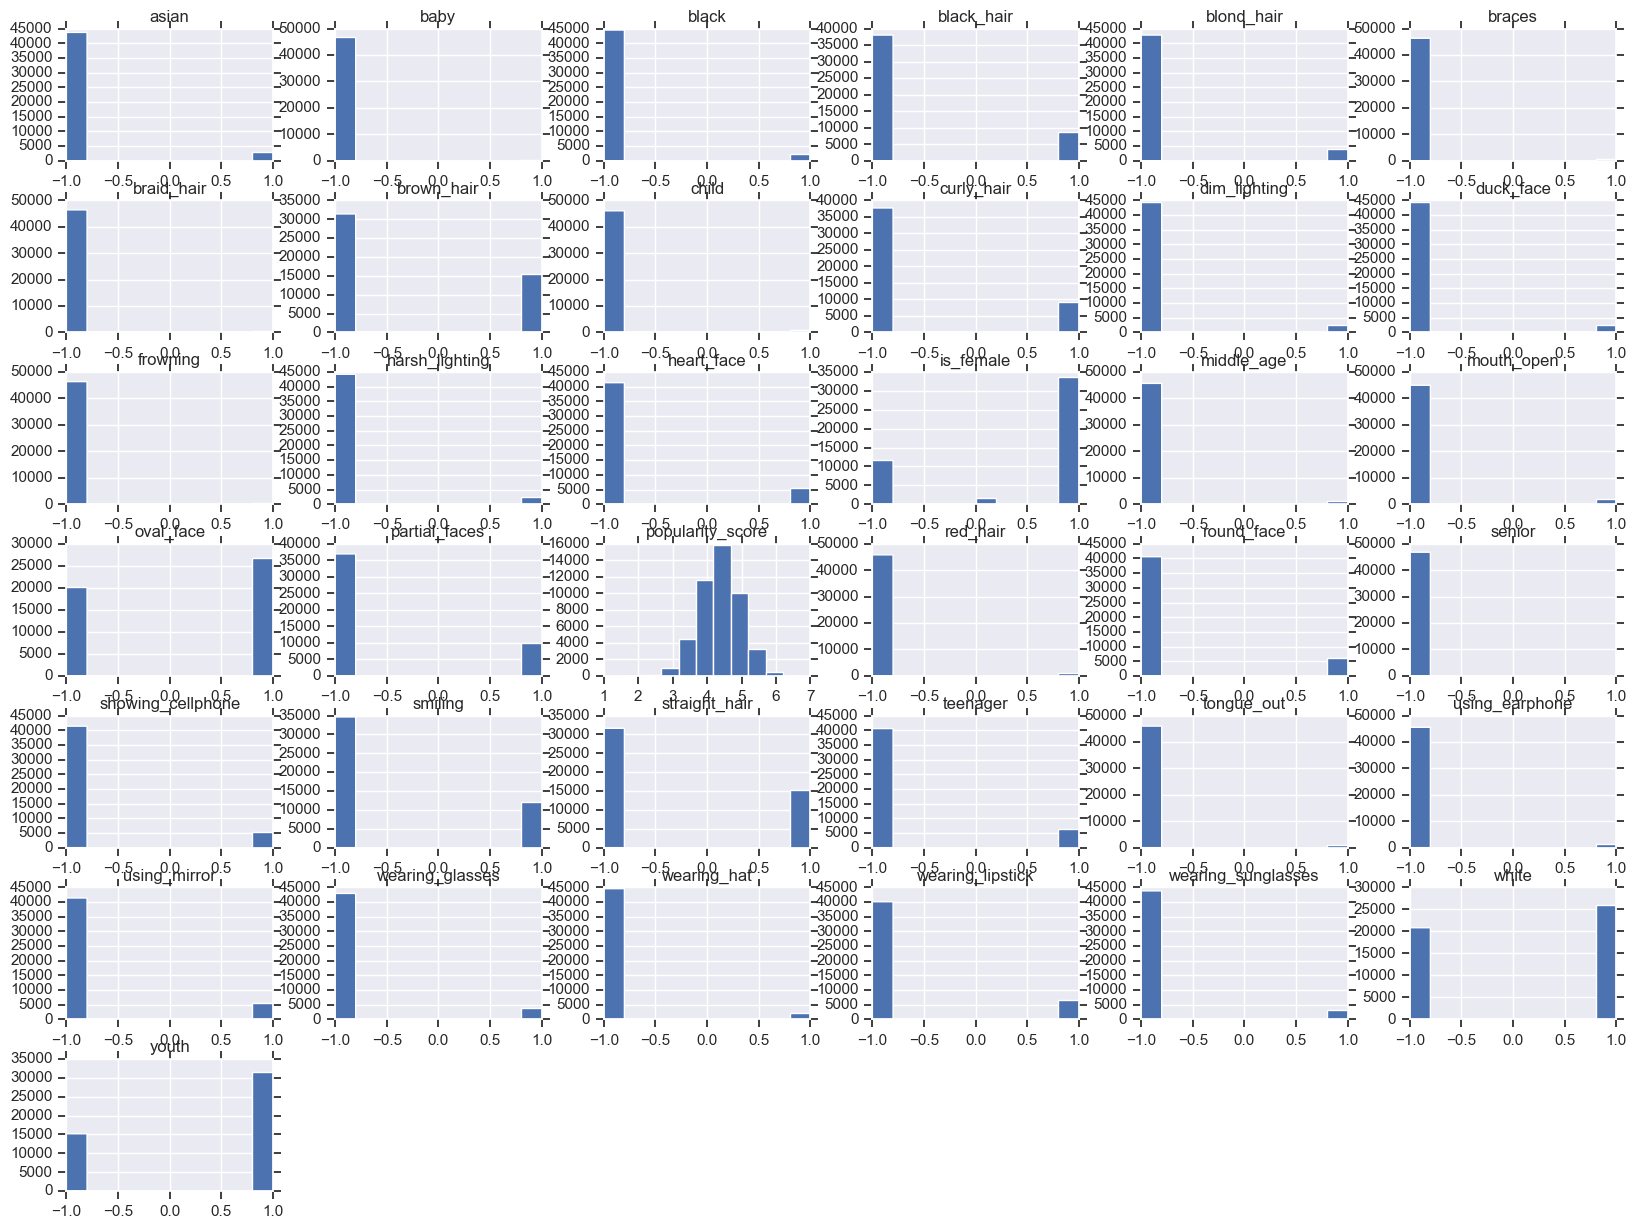

In [5]:
hist = data_ori.hist(figsize=(20, 15))

In [32]:
#extraemos una muestra aleatoria de los datos para proceder a darles la clasificación
import glob
x= glob.glob('/Users/alexander/Documents/Inteligentes/proyecto final/Selfie-dataset/images/10245*.jpg')
print(len(x))

x_sort=x
x_sort.sort()
#x_sort=x_sort[:600]

ee='/Users/alexander/Documents/Inteligentes/proyecto final/Selfie-dataset/images/'
#print(len(ee))
    
import shutil, os
os.mkdir('/Users/alexander/Documents/Inteligentes/proyecto final/Selfie-dataset/images_muestra')
for f in x_sort:
    shutil.copy(f, '/Users/alexander/Documents/Inteligentes/proyecto final/Selfie-dataset/images_muestra')   
    
namefile=[]
for q in x_sort:
    temp=q[77:]
    namefile.append(temp)
#print(namefile)

namefile_full={q2.replace('.jpg','') for q2 in namefile}
#print(namefile_full)
data = [] 
with open('/Users/alexander/Documents/Inteligentes/proyecto final/Selfie-dataset/selfie_dataset.txt','r') as file:
    lines = file.read().split("\n")
    for line in lines: 
        for xprime in namefile_full:
            if xprime in line:
                data.append(line)

with open("/Users/alexander/Documents/Inteligentes/proyecto final/Selfie-dataset/selfie_dataset_muestra.txt", "w") as file:
    for elem in data:
        file.write(elem+"\n")
    file.close()    
        

1252


In [36]:
data_rec.to_csv(r'/Users/alexander/Documents/dataexport.csv')    

In [26]:
#comprobamos la distribucion de la información y la correlación de las columnas con las que vamos a clasificar
data_ori = pd.read_excel('/Users/alexander/Documents/Inteligentes/proyecto final/dataexport.xlsx')
correl =data_ori.corr()


popularity_score  partial_faces  is_female      baby  \
popularity_score            1.000000      -0.034197   0.126606  0.002075   
partial_faces              -0.034197       1.000000   0.301555 -0.022558   
is_female                   0.126606       0.301555   1.000000 -0.047899   
baby                        0.002075      -0.022558  -0.047899  1.000000   
child                      -0.023754      -0.065938  -0.107550 -0.003693   
teenager                   -0.003358       0.153170   0.130016 -0.020304   
youth                       0.017989      -0.098693  -0.063749 -0.035555   
middle_age                 -0.010514      -0.082908  -0.080883 -0.004724   
senior                           NaN            NaN        NaN       NaN   
white                      -0.014130       0.109130   0.114807  0.023169   
black                       0.026609      -0.080659  -0.059507 -0.007678   
asian                       0.061728      -0.044827   0.056162 -0.008009   
oval_face                   0.008057      -0.020659  -0.079996 -0.085274   
round_face                 -0.001160       0.011779   0.078334  0.087647   
heart_face                       NaN            NaN        NaN       NaN   
smiling                     0.064438       0.083982   0.136884  0.046777   
mouth_open                 -0.048549      -0.028857  -0.056506 -0.005766   
frowning                   -0.012230       0.028062   0.019869 -0.002120   
wearing_glasses            -0.007339      -0.021844   0.003684 -0.009458   
wearing_sunglasses          0.067233      -0.095193  -0.082759 -0.007868   
wearing_lipstick            0.125712       0.141775   0.461271 -0.022407   
tongue_out                 -0.008655       0.013773   0.033861 -0.004795   
duck_face                  -0.013163       0.048889   0.104895 -0.008009   
black_hair                 -0.031115      -0.072924  -0.038193 -0.012070   
blond_hair                  0.029887       0.034877   0.078356  0.105427   
brown_hair                  0.032679       0.065986   0.125150 -0.039299   
red_hair                    0.028354       0.029075   0.050331 -0.002406   
curly_hair                  0.053195       0.062725   0.188557 -0.014930   
straight_hair               0.060323       0.098705   0.271837 -0.029145   
braid_hair                  0.012508       0.013741   0.056102 -0.003415   
showing_cellphone          -0.090638      -0.196693  -0.024016 -0.011207   
using_earphone              0.011680      -0.028597  -0.074447 -0.004430   
using_mirror               -0.086352      -0.204189  -0.031760 -0.011283   
braces                      0.019106       0.015948   0.031681 -0.003602   
wearing_hat                -0.037360      -0.127849  -0.205575 -0.008055   
harsh_lighting             -0.053061       0.020457   0.011306 -0.005332   
dim_lighting               -0.053061       0.020457   0.011306 -0.005332   
image_quality              -0.043261      -0.015116  -0.031965  0.029567   
frame                      -0.031308      -0.012608  -0.021908 -0.008034   
filter                     -0.035260      -0.069613  -0.078641  0.050022   
brightness                 -0.006367       0.027849   0.034375  0.034575   

                       child  teenager     youth  middle_age  senior  \
popularity_score   -0.023754 -0.003358  0.017989   -0.010514     NaN   
partial_faces      -0.065938  0.153170 -0.098693   -0.082908     NaN   
is_female          -0.107550  0.130016 -0.063749   -0.080883     NaN   
baby               -0.003693 -0.020304 -0.035555   -0.004724     NaN   
child               1.000000 -0.093798 -0.164251   -0.021822     NaN   
teenager           -0.093798  1.000000 -0.903112   -0.119986     NaN   
youth              -0.164251 -0.903112  1.000000   -0.210108     NaN   
middle_age         -0.021822 -0.119986 -0.210108    1.000000     NaN   
senior                   NaN       NaN       NaN         NaN     NaN   
white               0.018229  0.034897 -0.039638   -0.003411     NaN   
black              -0.010881 -0.075

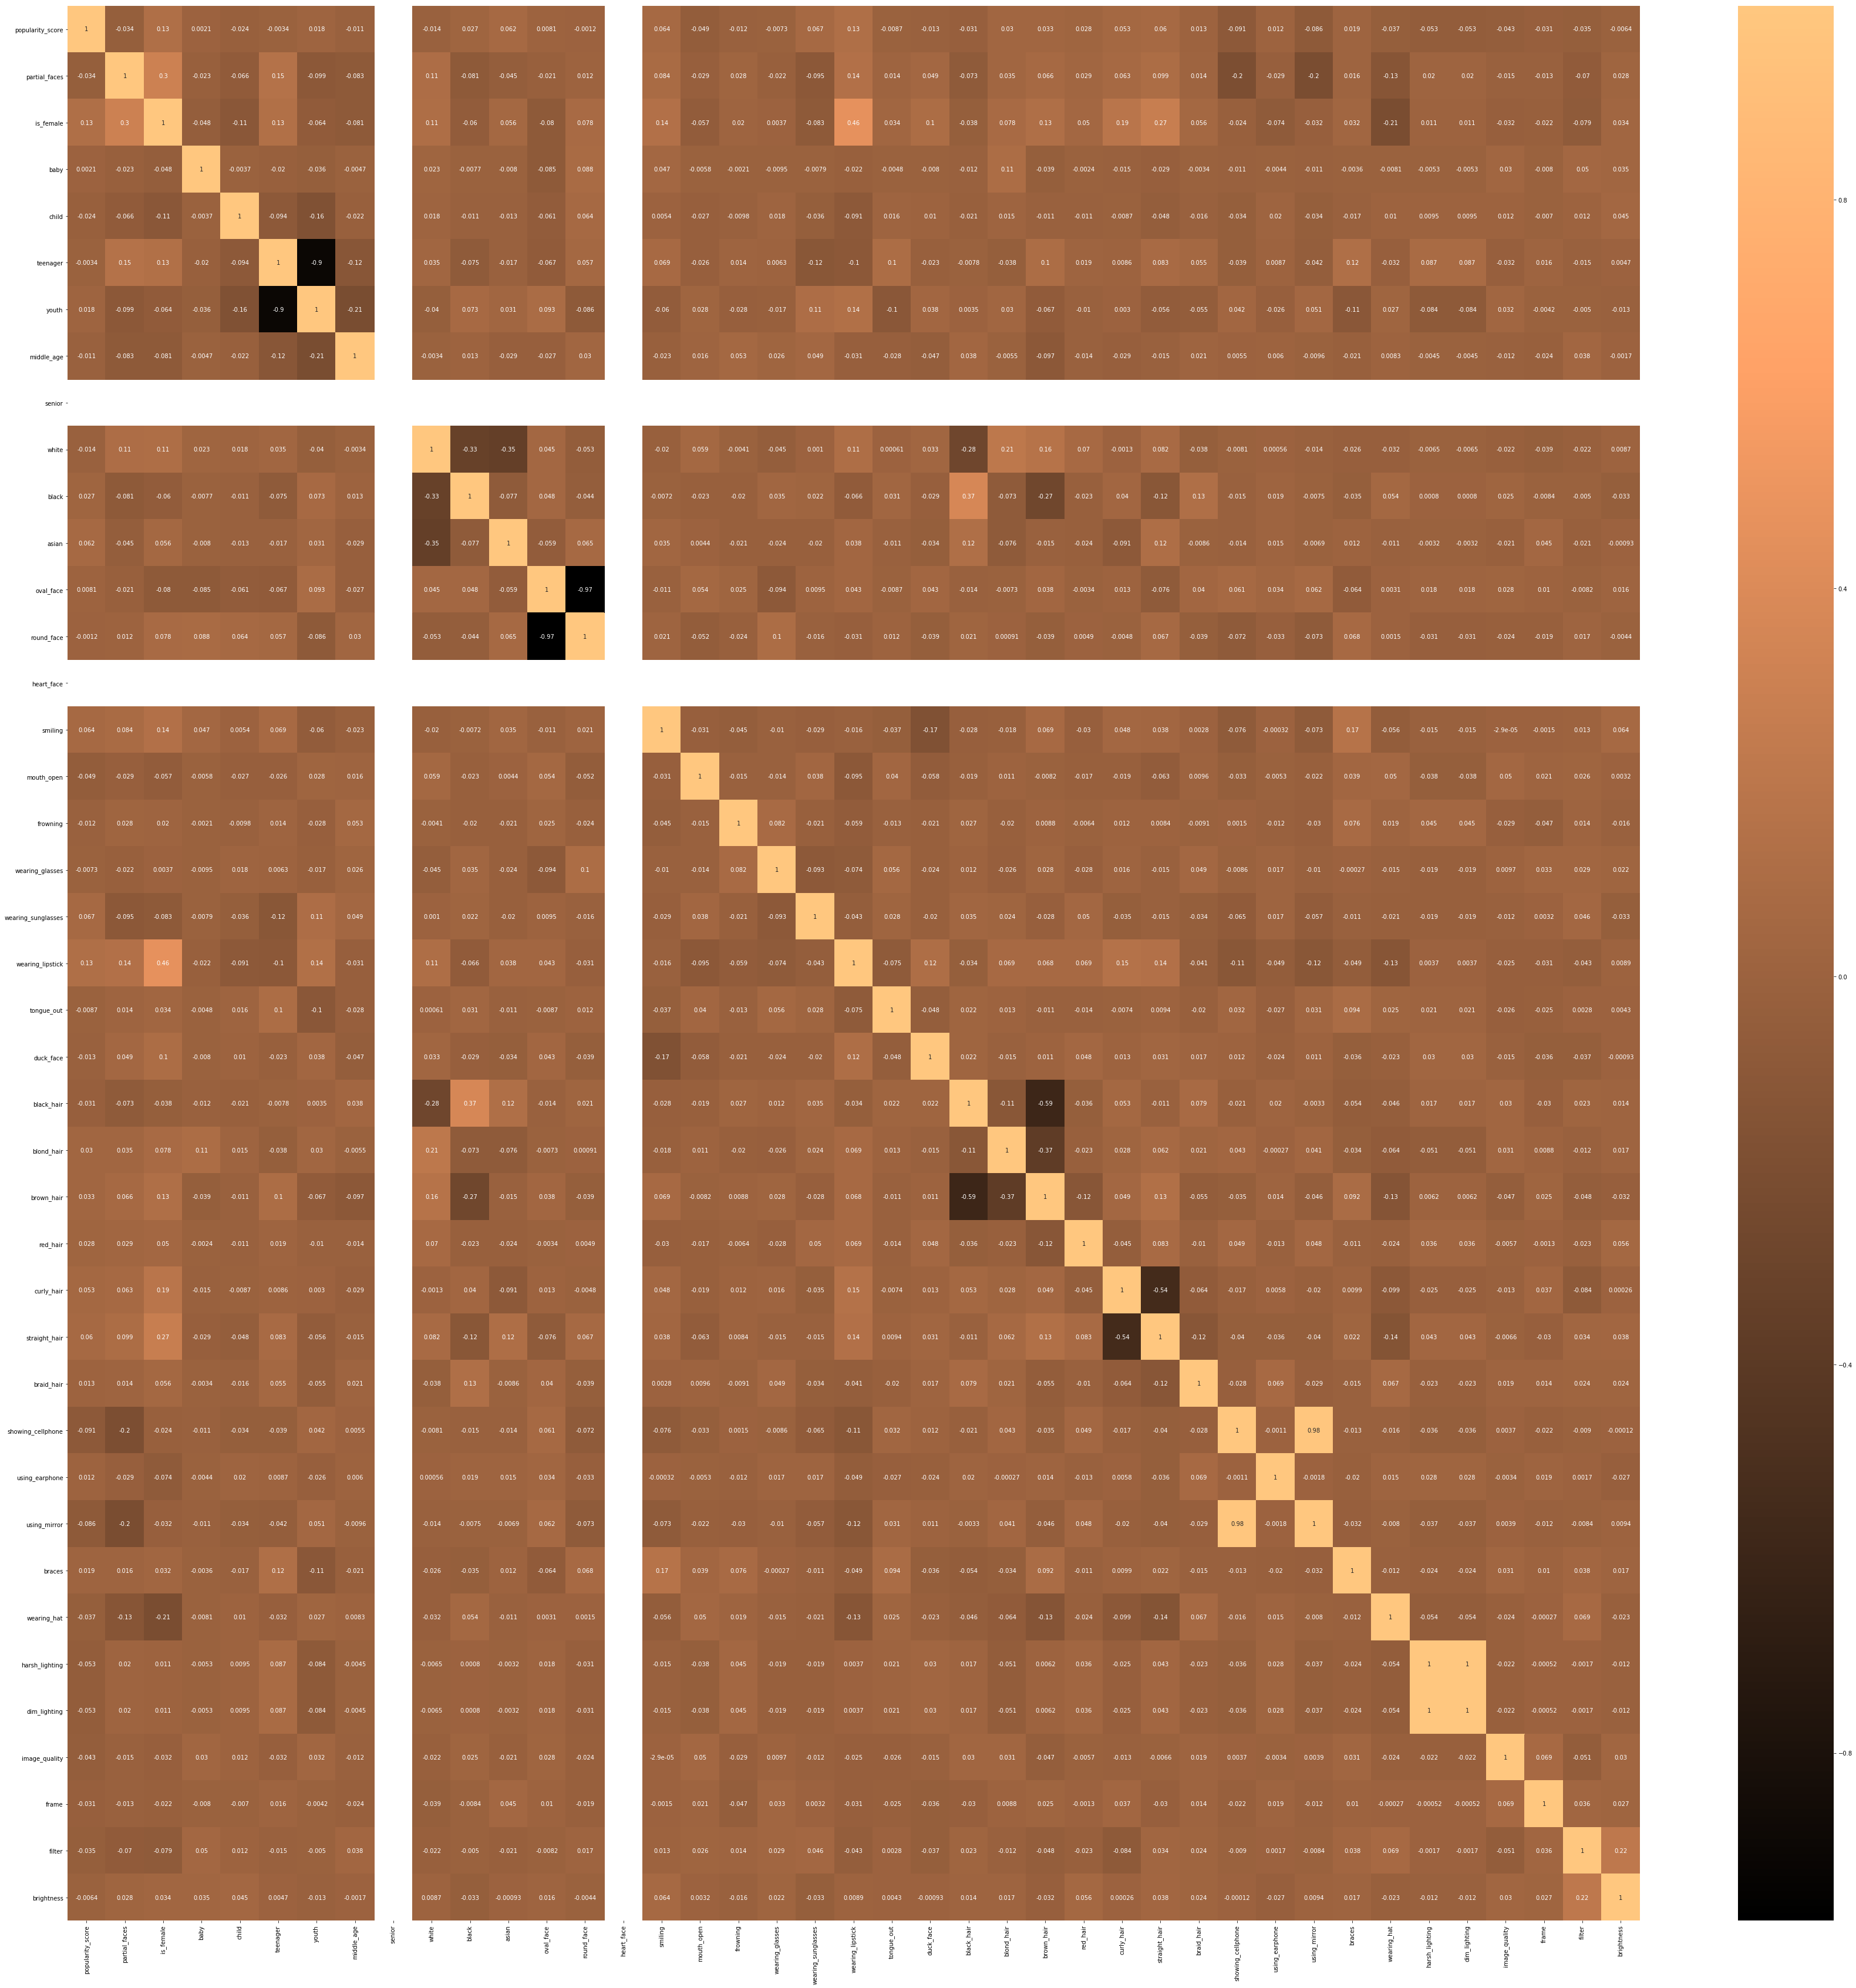

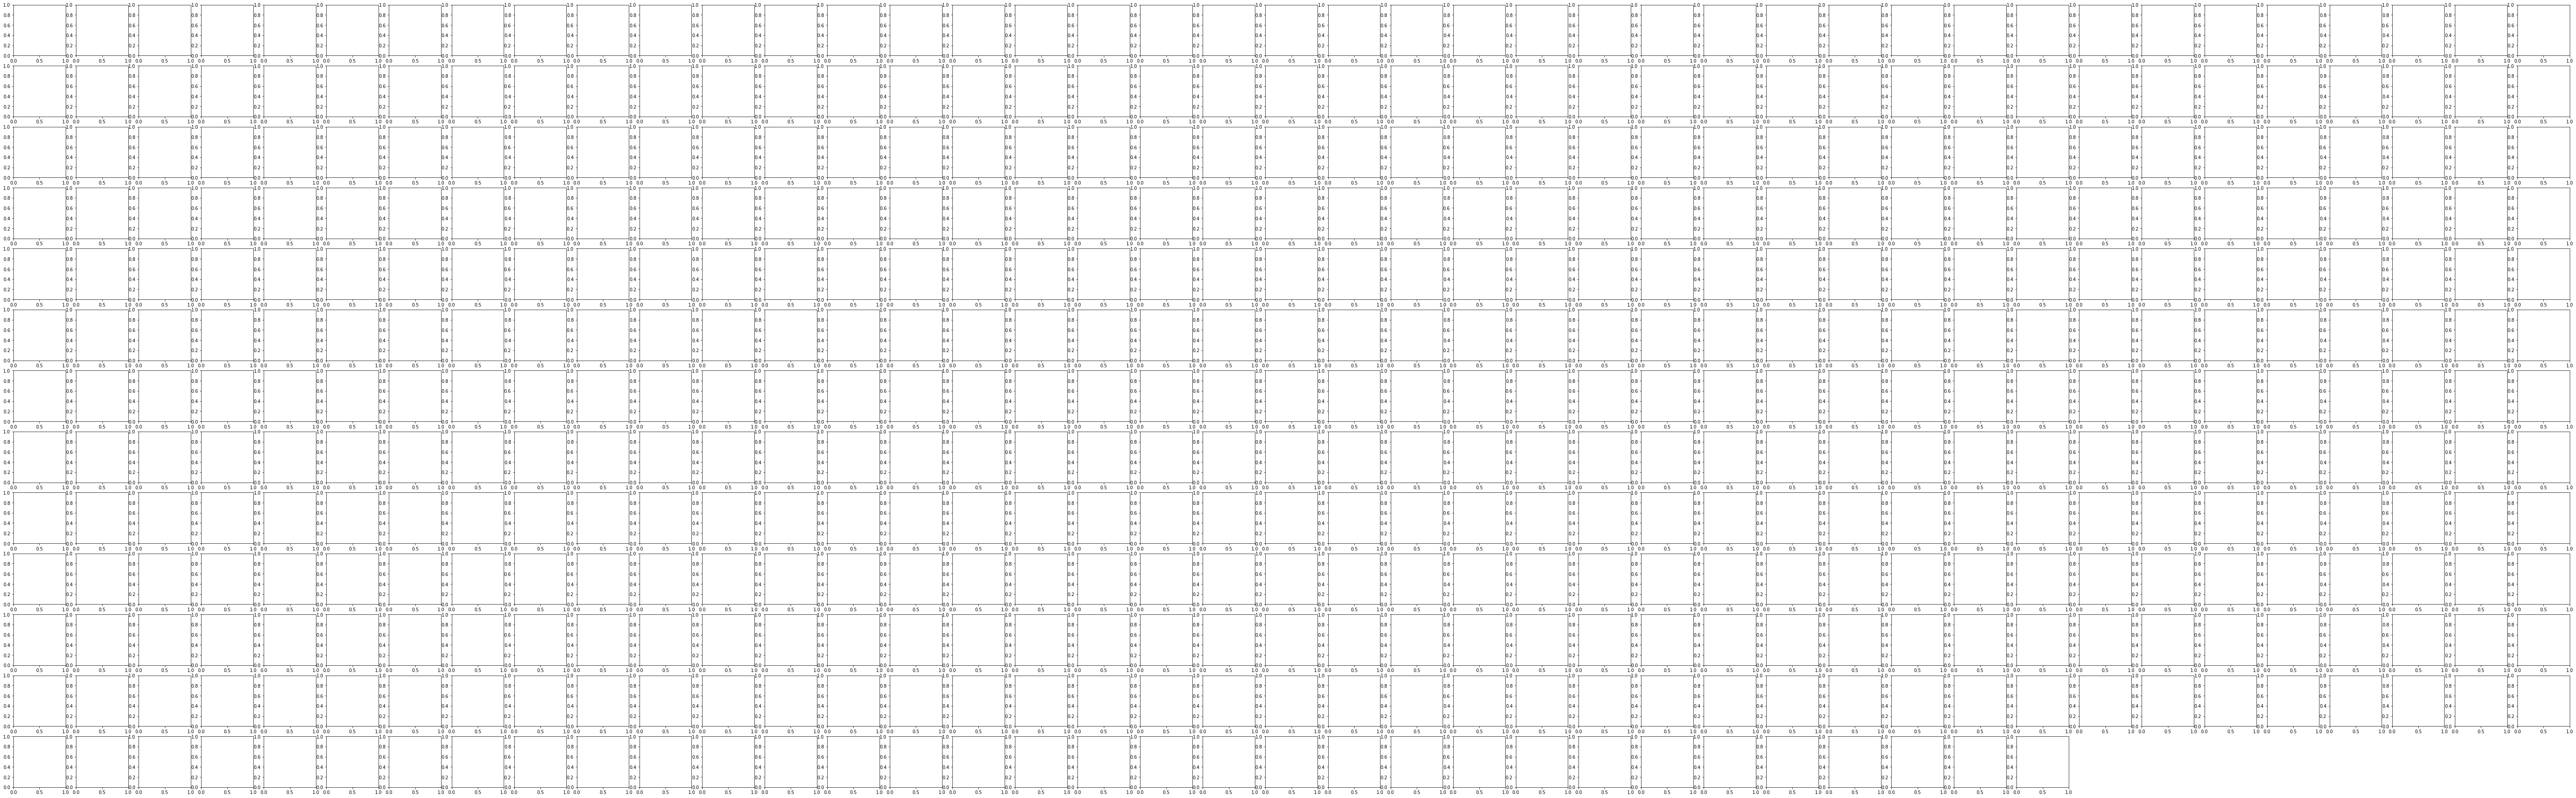

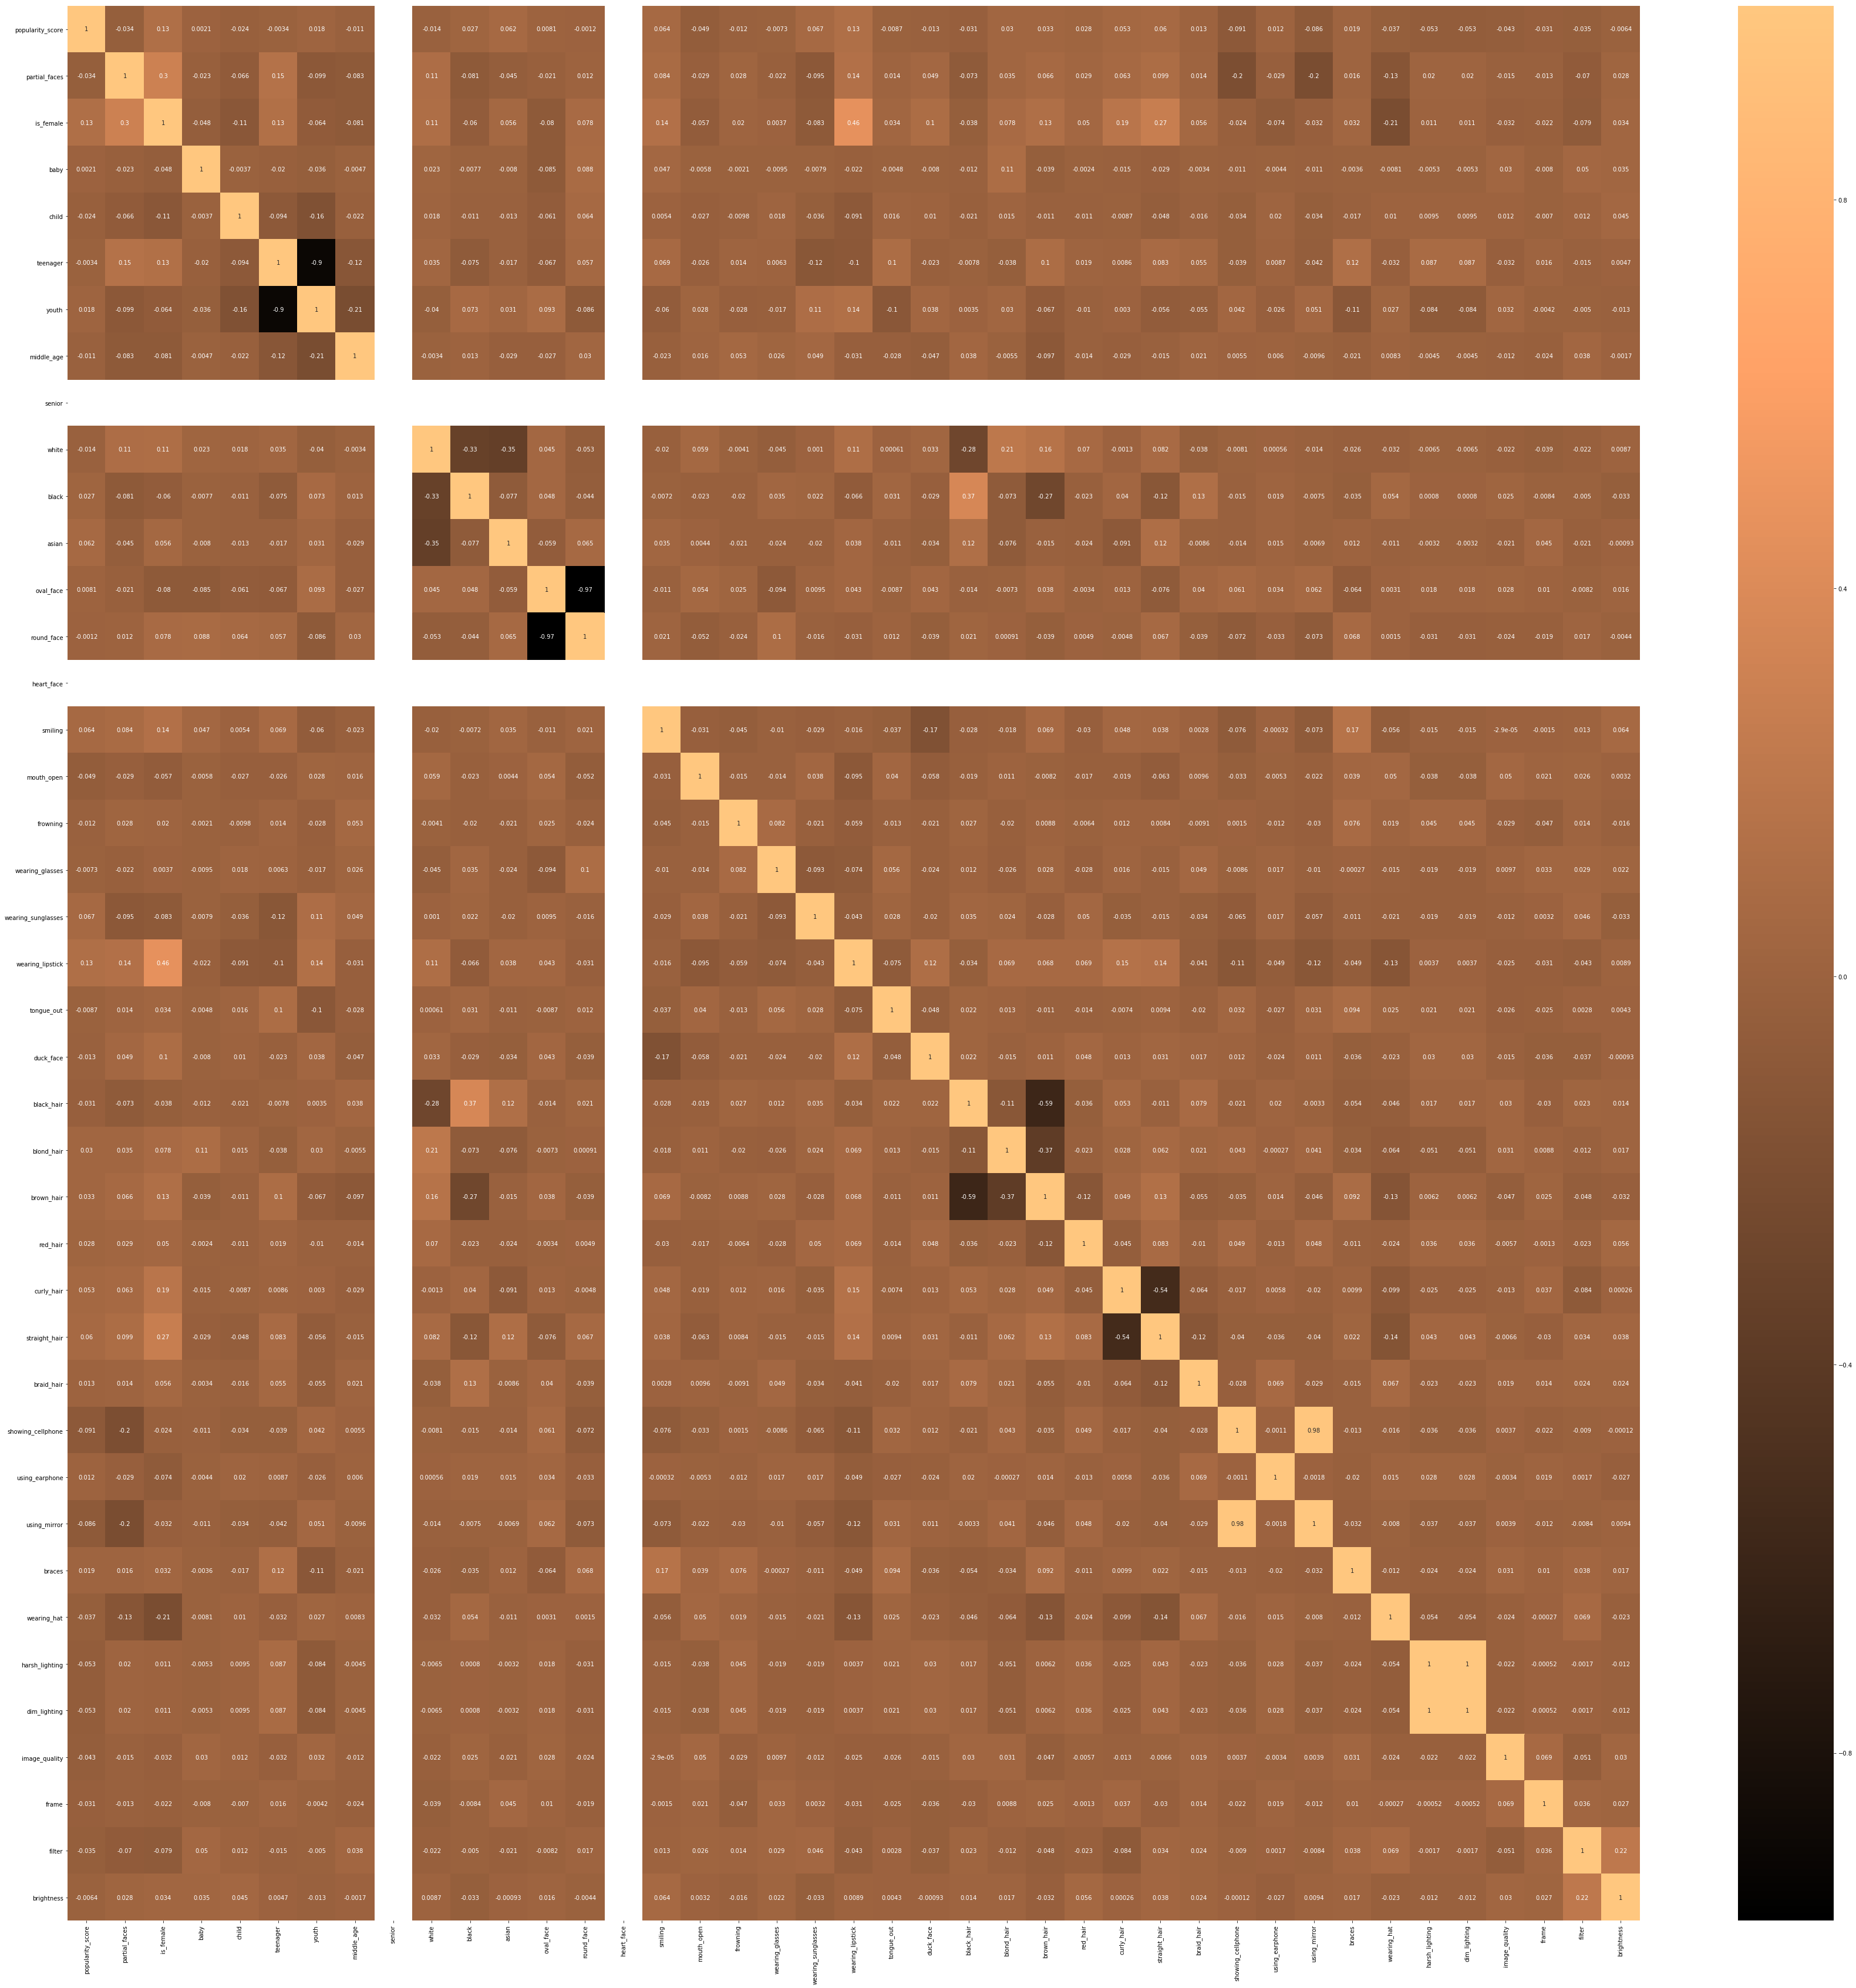

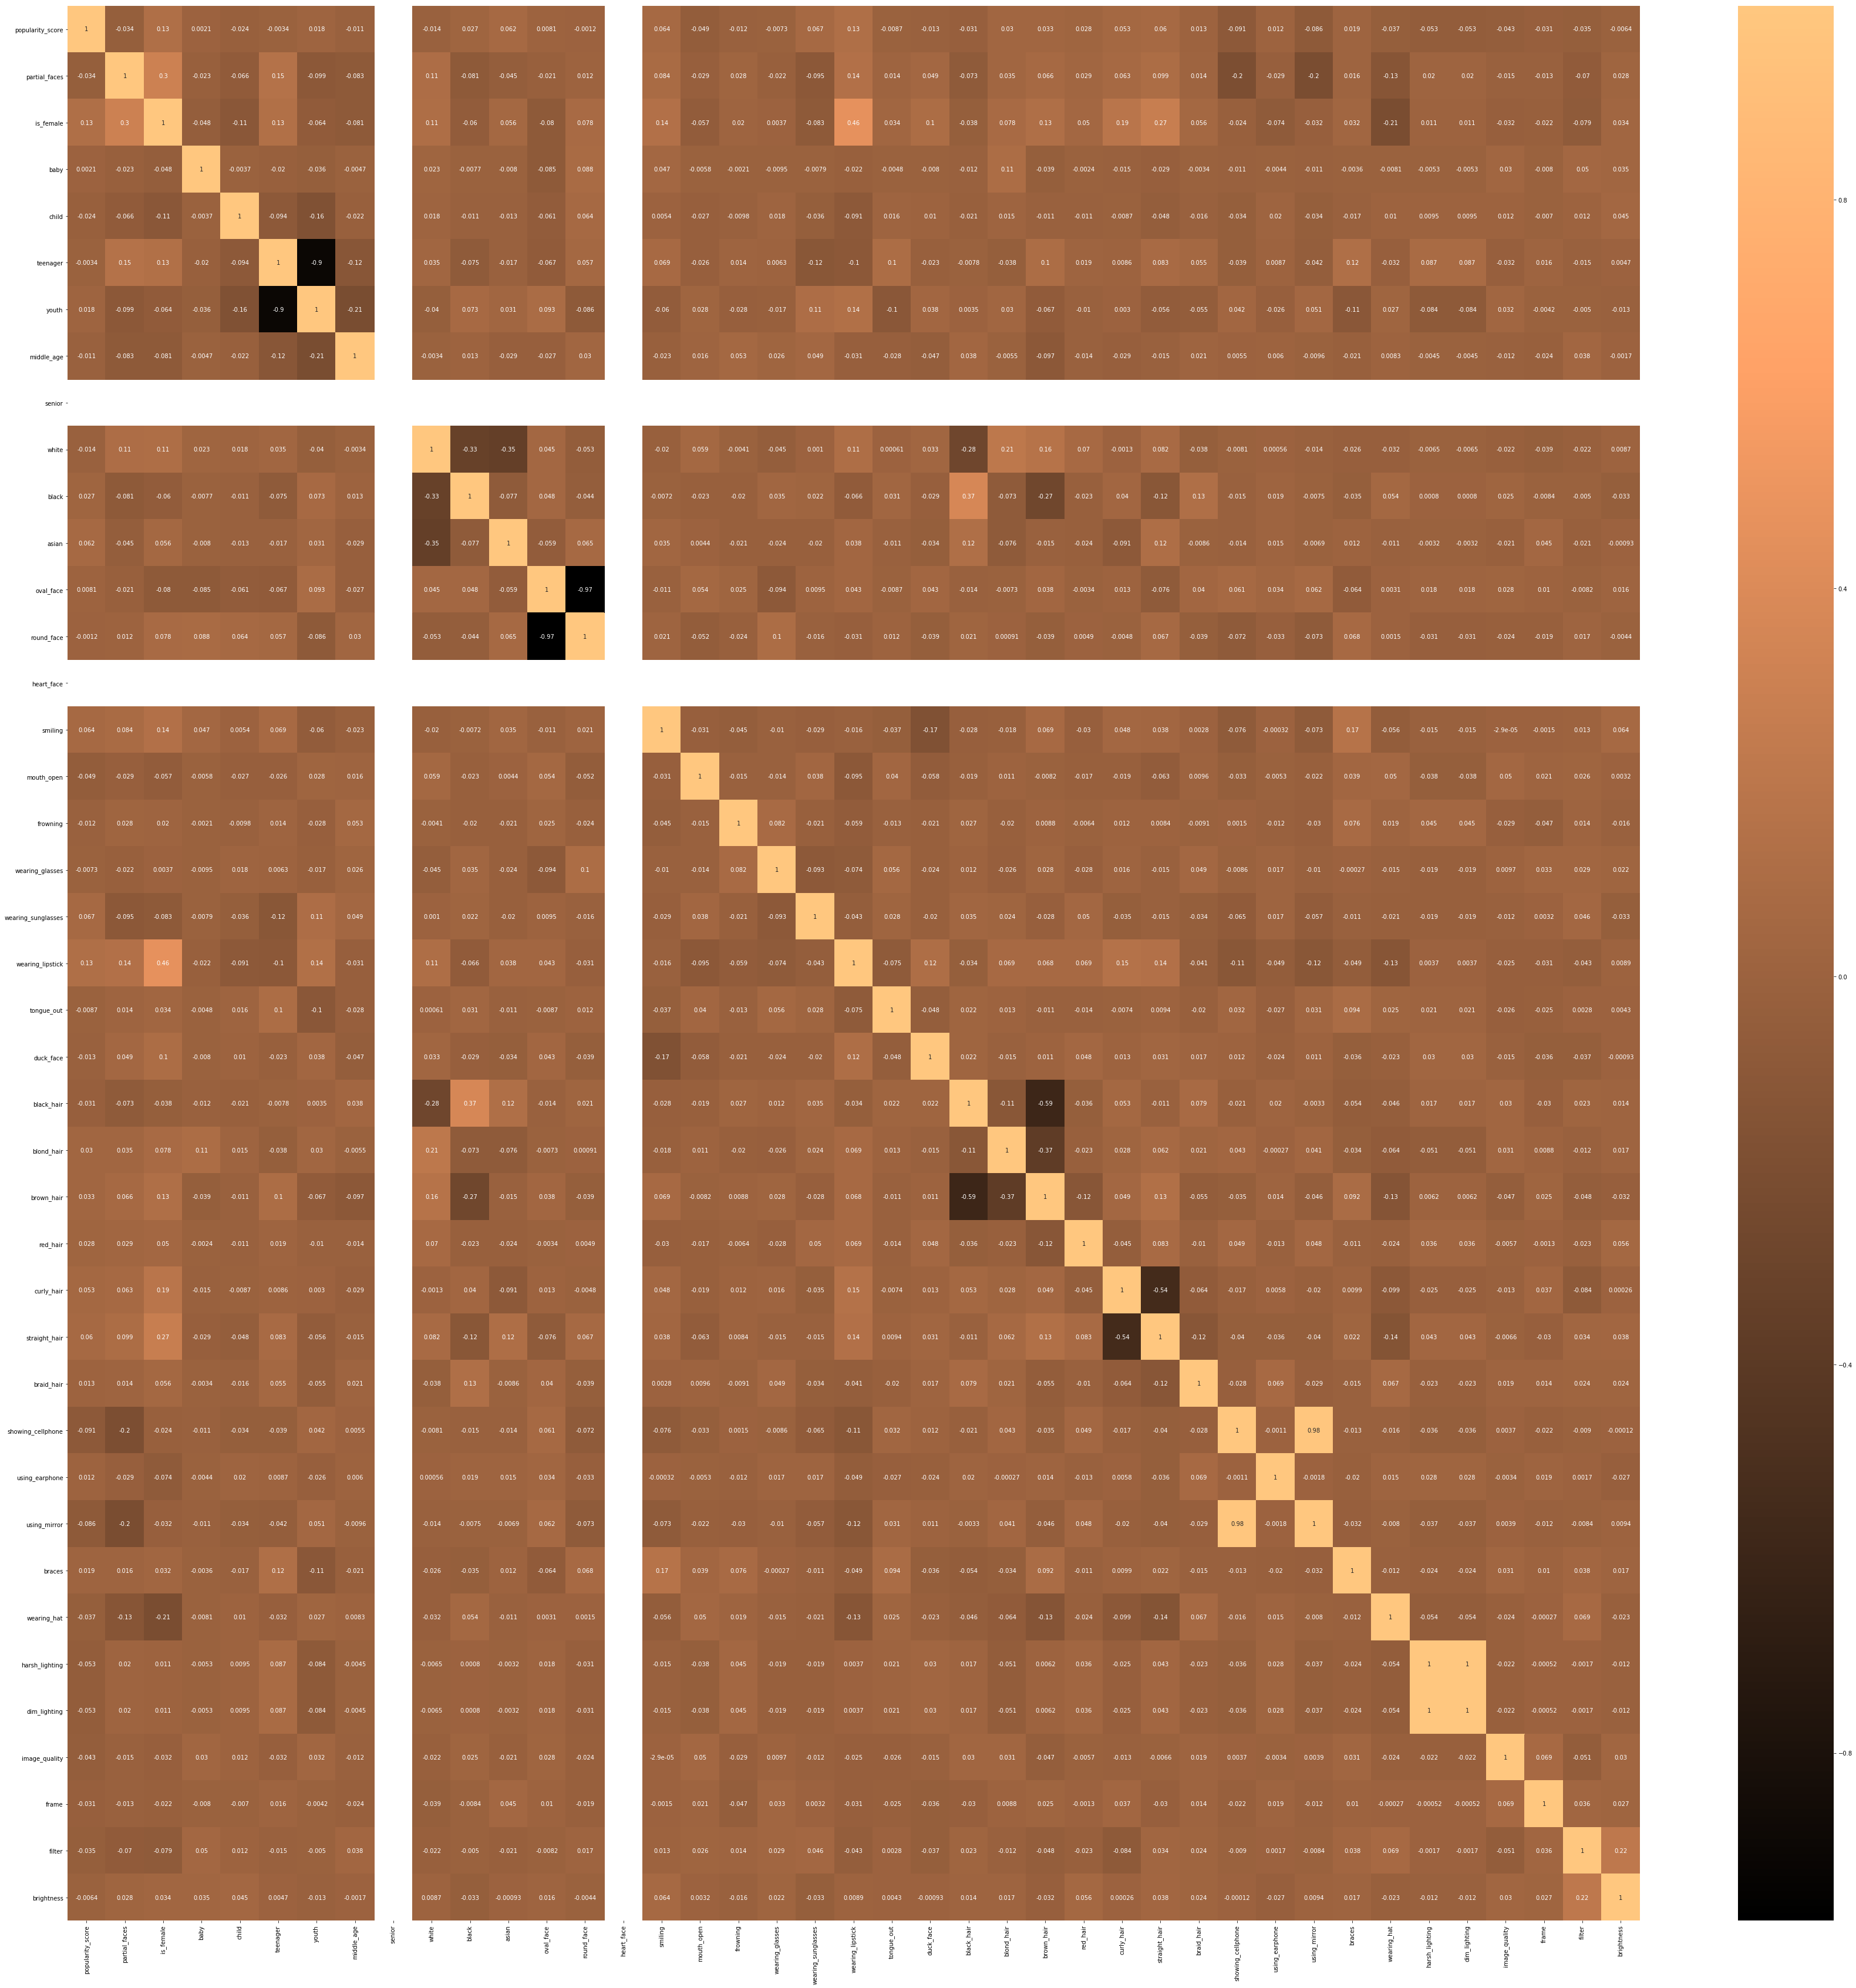

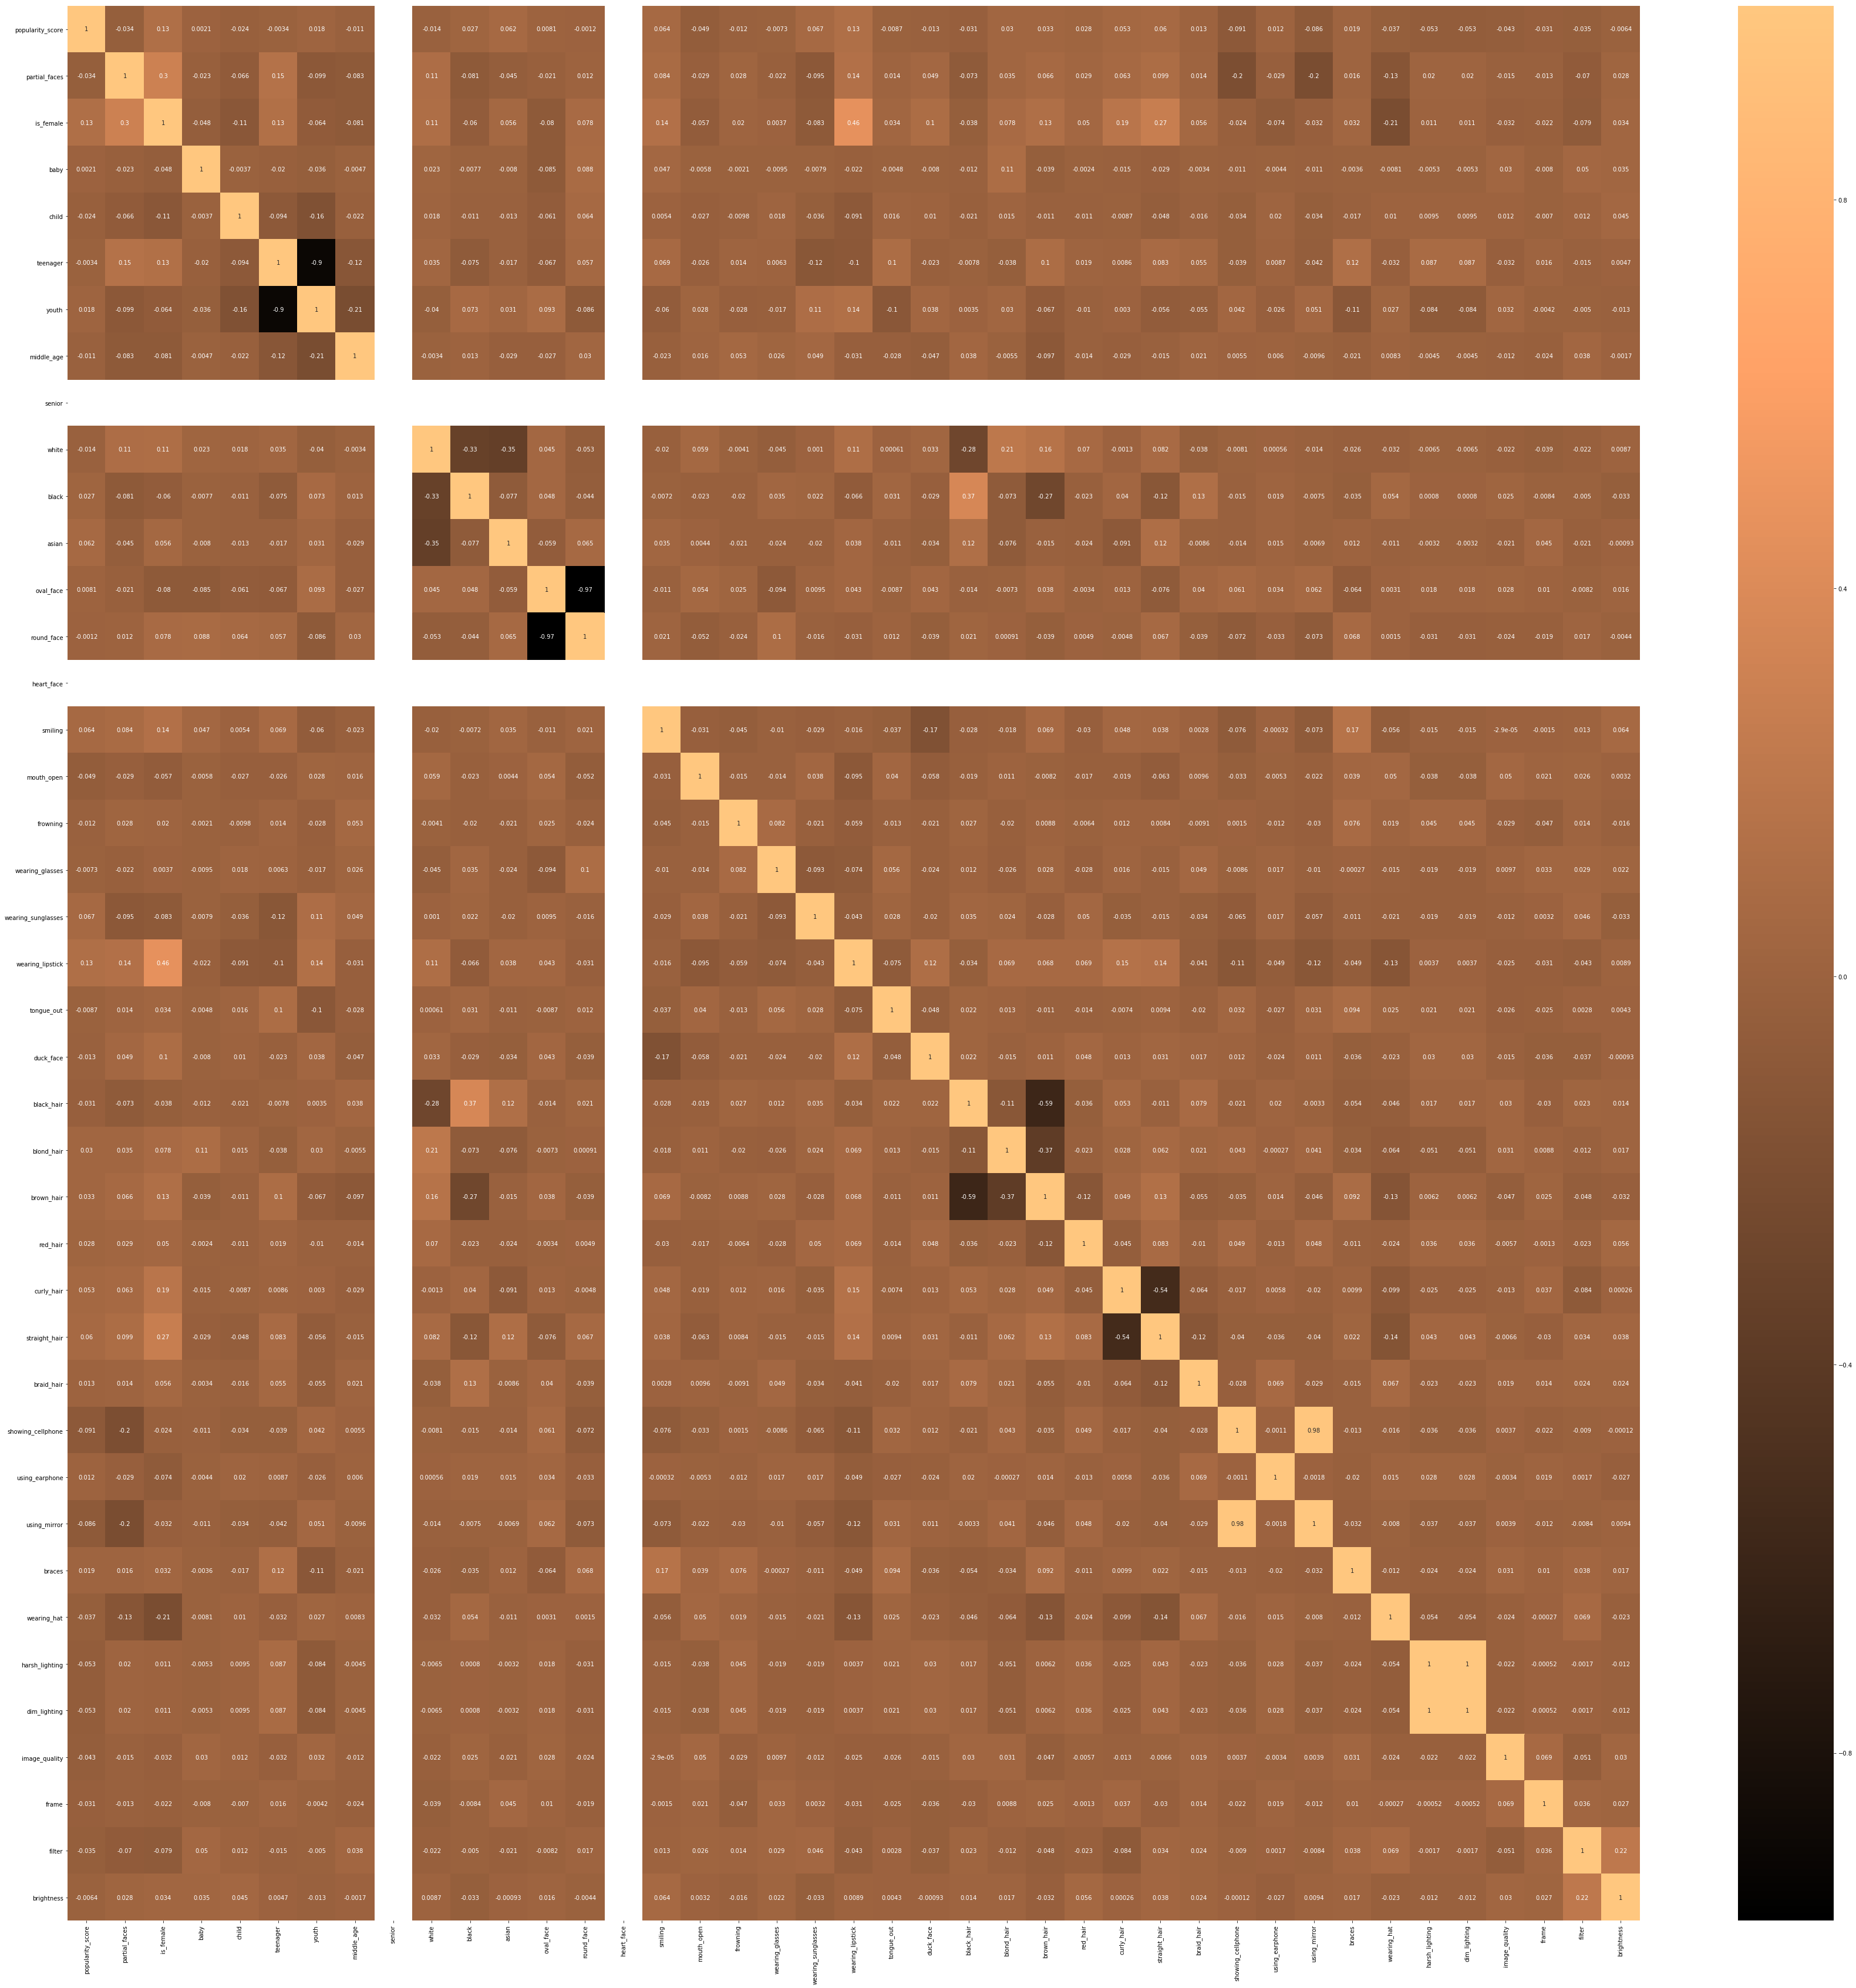

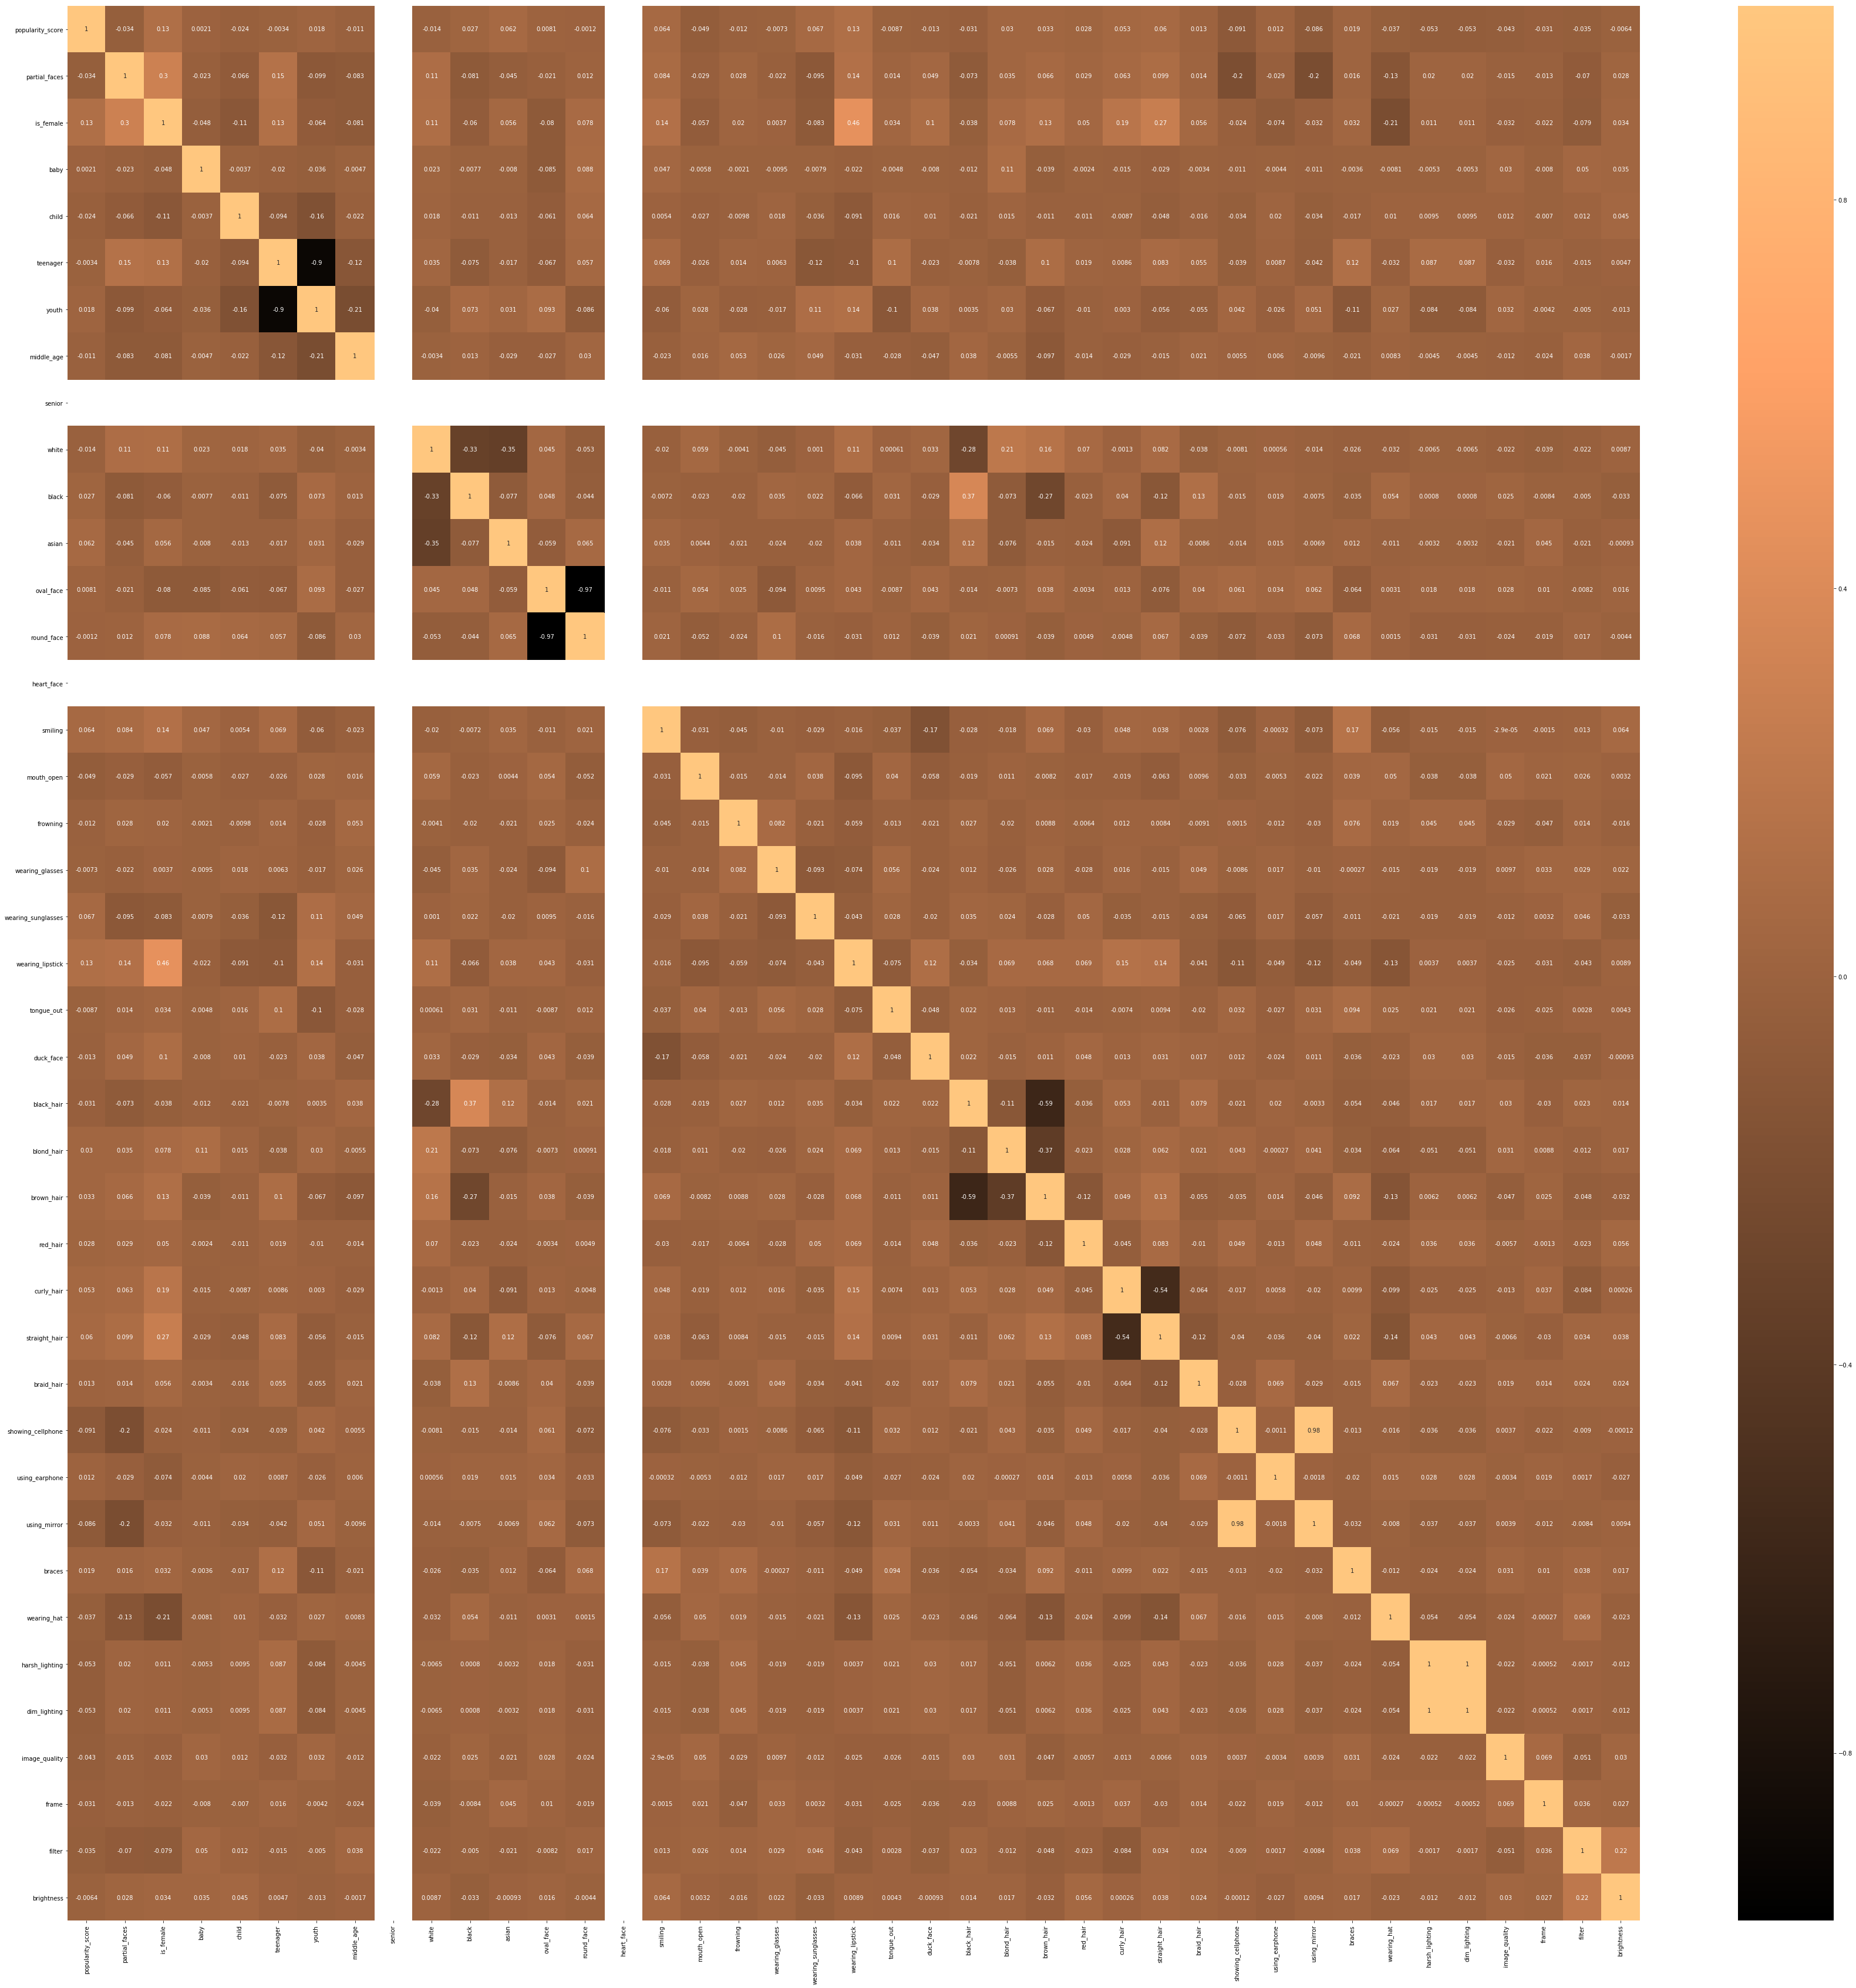

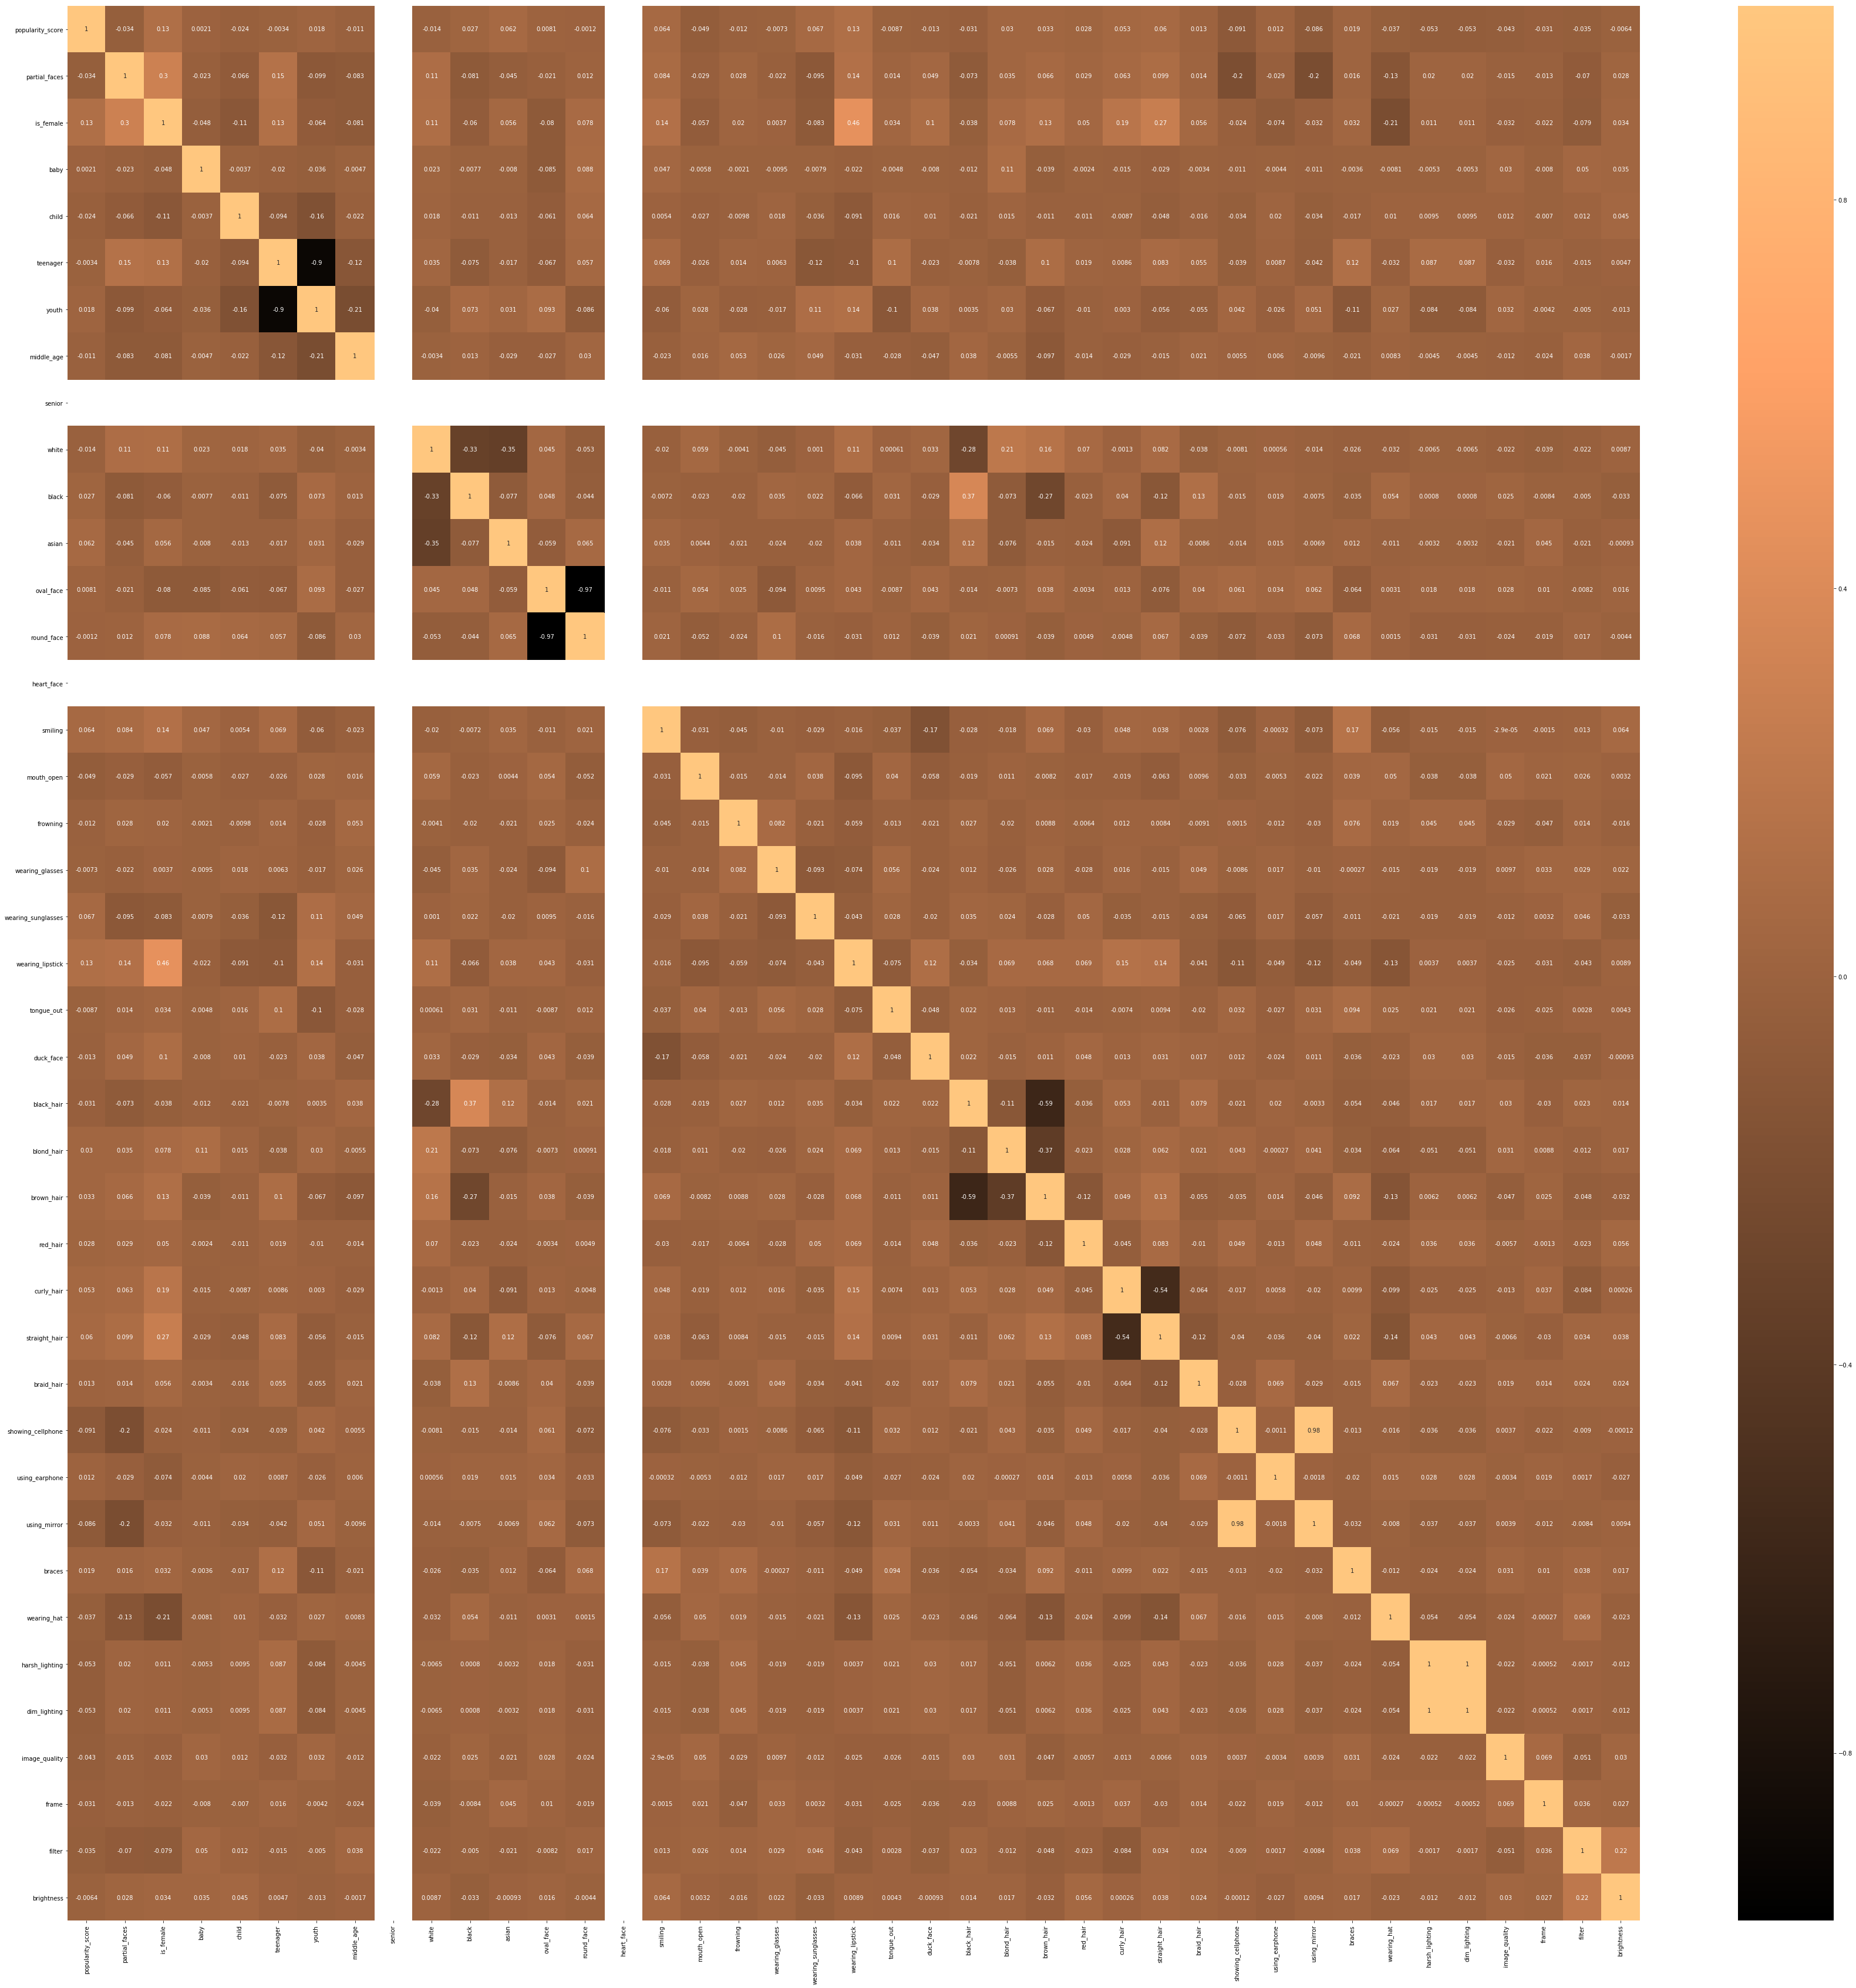

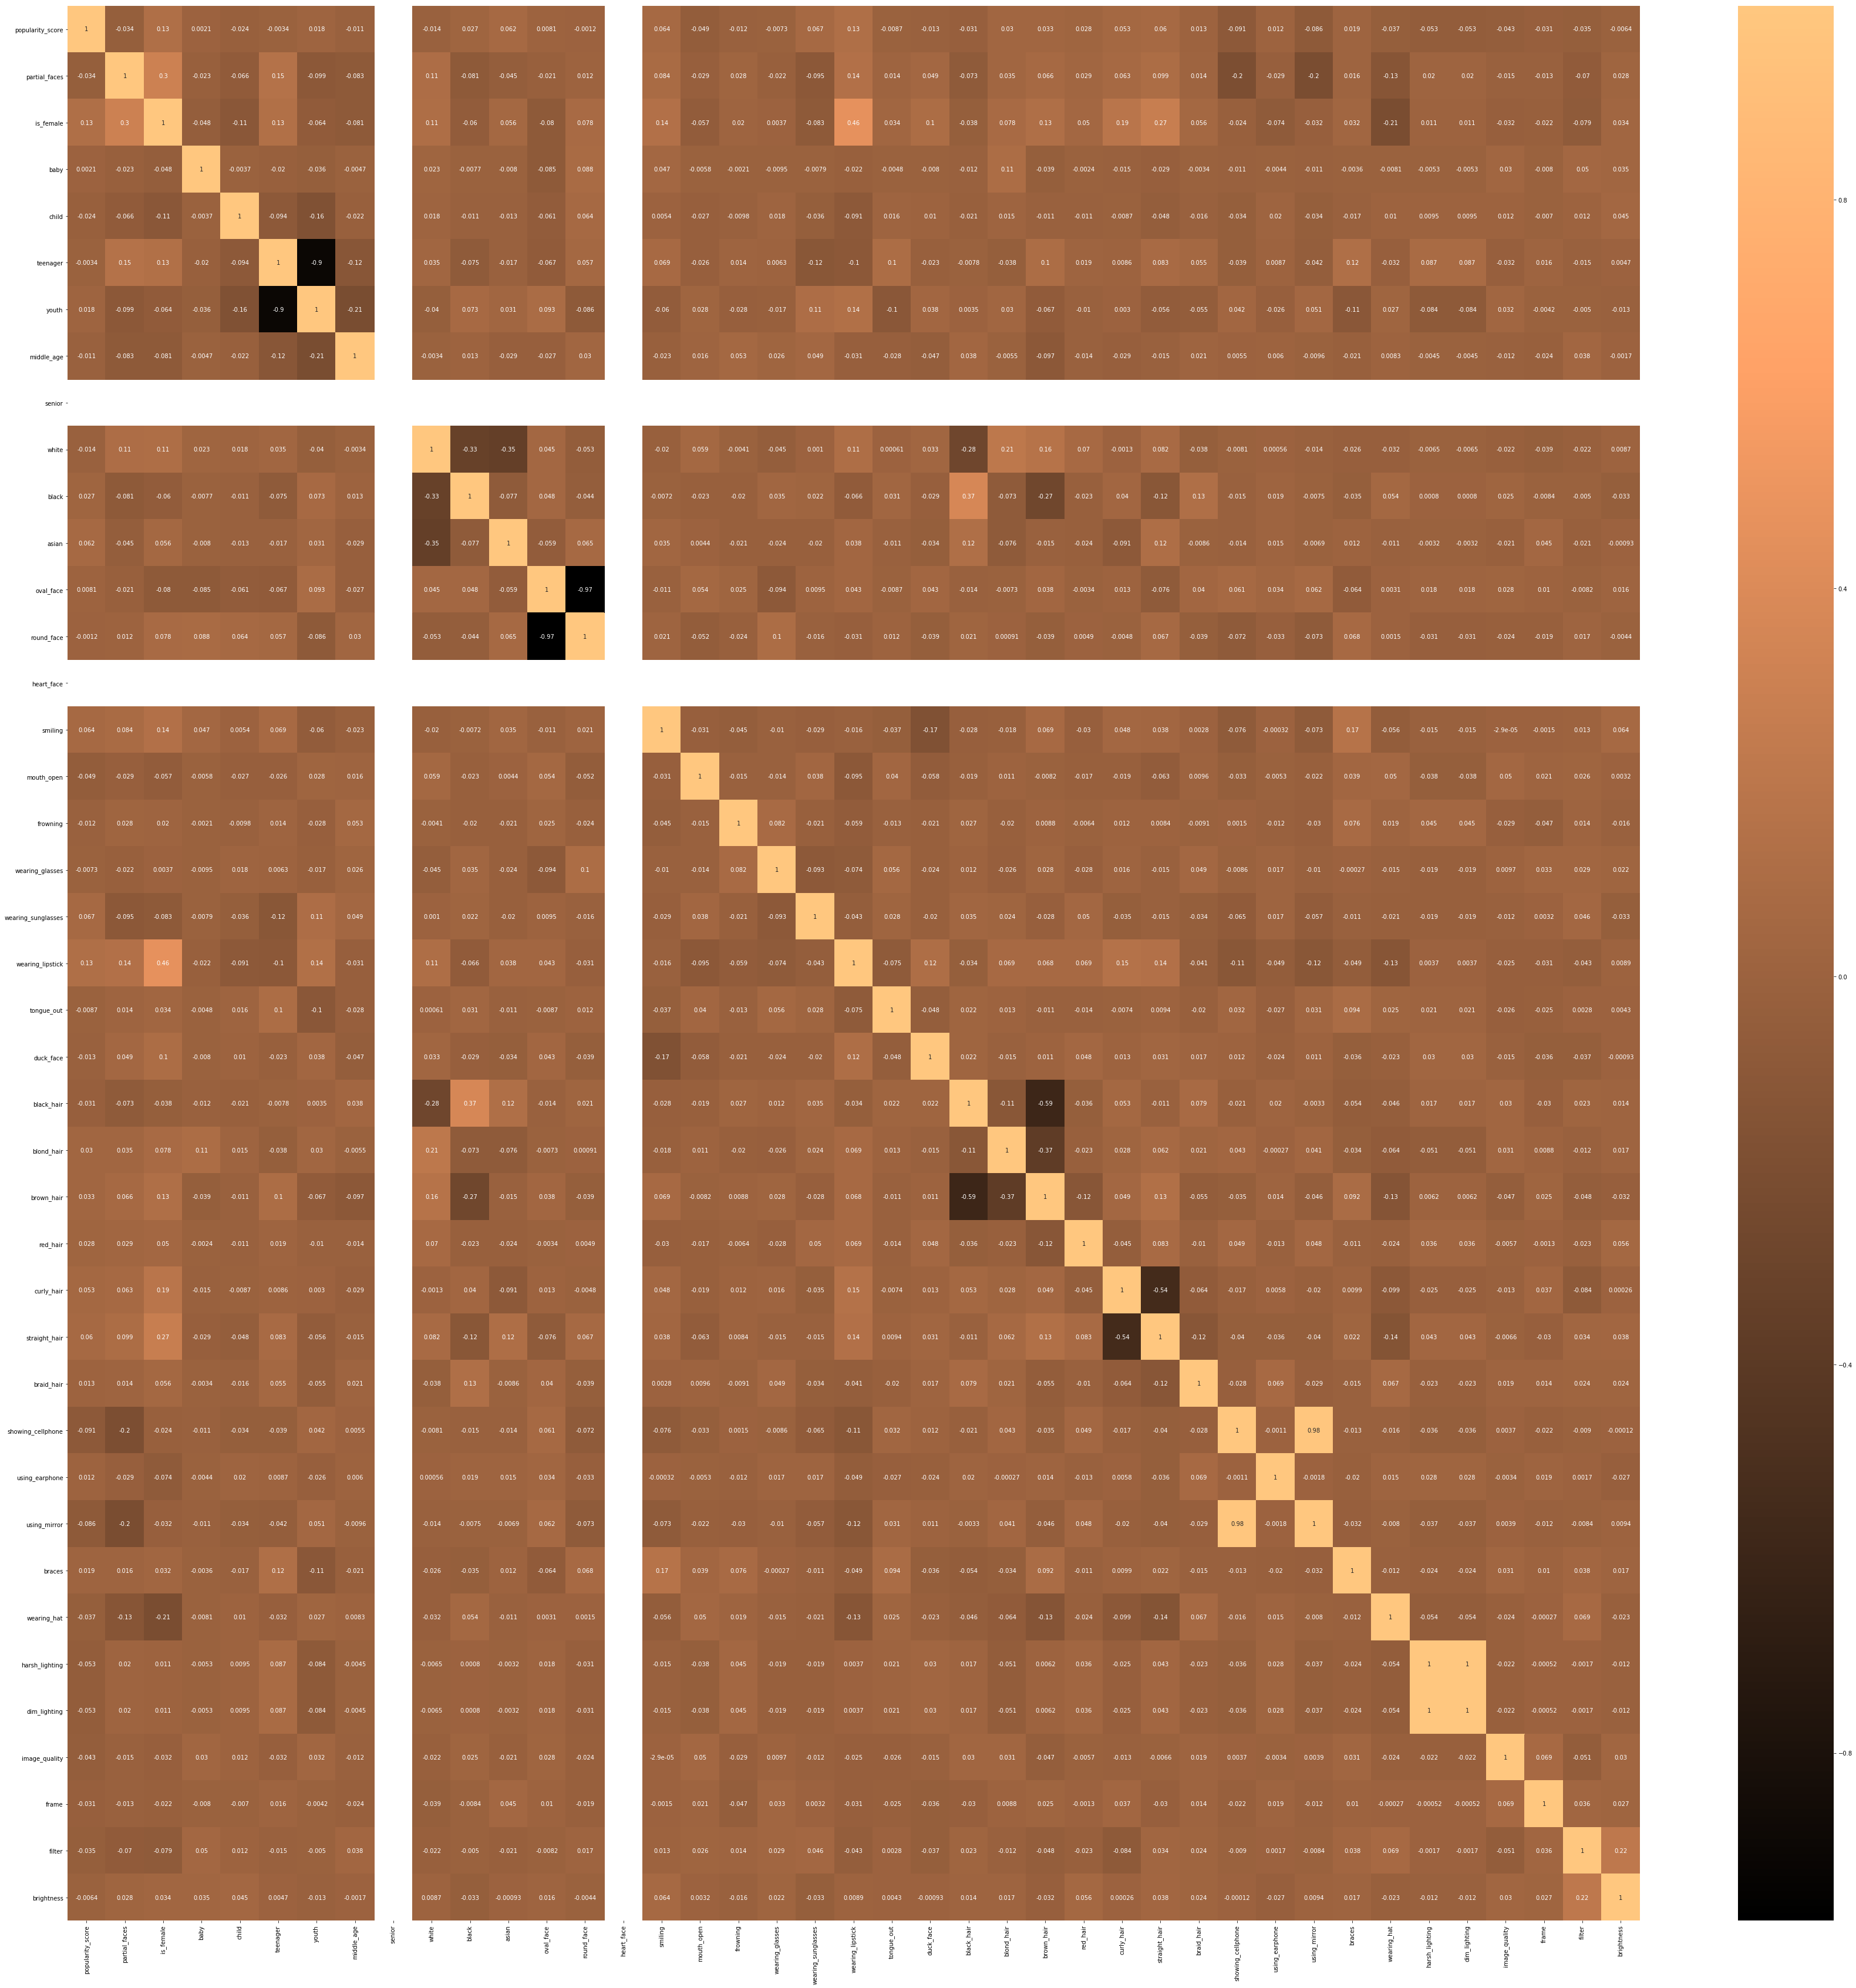

In [39]:
fig, ax = pyp.subplots(figsize=(60,60))   
sns.heatmap(correl, annot=True,  cmap="copper")
plt.show(sns)

In [40]:
bright_top = correl[correl['brightness']>0].sort_values(by='brightness').index.tolist() 
filter_top = correl[correl['filter']>0].sort_values(by='filter').index.tolist() 
frame_top = correl[correl['frame']>0].sort_values(by='frame').index.tolist() 
image_quality_top = correl[correl['image_quality']>0].sort_values(by='image_quality').index.tolist() 
print(bright_top[:5])
print(filter_top[:5])
print(frame_top[:5])
print(image_quality_top[:7])

['curly_hair', 'mouth_open', 'tongue_out', 'teenager', 'white']
['using_earphone', 'tongue_out', 'child', 'smiling', 'frowning']
['wearing_sunglasses', 'blond_hair', 'braces', 'oval_face', 'braid_hair']
['showing_cellphone', 'using_mirror', 'wearing_glasses', 'child', 'braid_hair', 'black', 'oval_face']


In [217]:
#obtenemos el path de todas las imagenes y lo volvemos serie de pandas
import glob
from pathlib import Path
fpaths = list(Path('/Users/alexander/Documents/Inteligentes/proyecto final/Selfie-dataset/images_muestra').rglob('*.jpg'))
fpaths_s = pd.Series(fpaths,name='fpaths')
fpaths_s=fpaths_s.sort_values()
fpaths_s.replace("\t"," ", regex=True)
fpaths_s=fpaths_s.apply(lambda x: str(x));
for x in fpaths_s:
    if type(x) is not str:
        str(x)      

In [218]:
#crea el dataset
from sklearn.model_selection import train_test_split
ds_selected=data_ori.filter(['frame','filter','brightness','image_quality','curly_hair', 'mouth_open', 'tongue_out', 'teenager', 'white','using_earphone', 'tongue_out', 'child', 'smiling', 'frowning','wearing_sunglasses', 'blond_hair', 'braces', 'oval_face', 'braid_hair'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(fpaths_s, ds_selected, test_size=0.15)

In [219]:
data_train = pd.concat([X_train, y_train ], axis=1);
data_test = pd.concat([X_test, y_test ], axis=1);

data_test['fpaths']=data_test['fpaths'].astype('|S')
print(data_train.shape)
print(data_test.shape)
data_train.dtypes


(1064, 20)
(188, 20)


fpaths                object
frame                  int64
filter                 int64
brightness             int64
image_quality          int64
curly_hair             int64
mouth_open             int64
tongue_out             int64
teenager               int64
white                  int64
using_earphone         int64
tongue_out             int64
child                  int64
smiling                int64
frowning               int64
wearing_sunglasses     int64
blond_hair             int64
braces                 int64
oval_face              int64
braid_hair             int64
dtype: object

In [220]:
from keras.preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2)
test_datagen = ImageDataGenerator(zoom_range=0.2)
'''
img = image.load_img(path, grayscale=False, target_size=None, interpolation='nearest')
img_array = image.img_to_array(img, data_format='channels_last')'''
#data_train=data_train.apply(lambda x: str(x));

data_train['fpaths']=data_train['fpaths'].apply(lambda x: str(x))
#test_generator=train_datagen.flow_from_dataframe(dataframe=data_test, directory="/Users/alexander/Documents/Inteligentes/proyecto final/Selfie-dataset/images_muestra", x_col="fpahts", y_col=['frame','filter','brightness','image_quality','curly_hair', 'mouth_open', 'tongue_out', 'teenager', 'white','using_earphone', 'tongue_out', 'child', 'smiling', 'frowning','wearing_sunglasses', 'blond_hair', 'braces', 'oval_face', 'braid_hair'], class_mode="categorical",batch_size=32)

In [221]:
train_generator=train_datagen.flow_from_dataframe(dataframe=data_train, directory="/Users/alexander/Documents/Inteligentes/proyecto final/Selfie-dataset/images_muestra", x_col="fpaths", y_col=['frame','filter','brightness','image_quality','curly_hair', 'mouth_open', 'tongue_out', 'teenager', 'white','using_earphone', 'tongue_out', 'child', 'smiling', 'frowning','wearing_sunglasses', 'blond_hair', 'braces', 'oval_face', 'braid_hair'], class_mode="other",batch_size=32)

Found 1064 validated image filenames.


In [237]:
import tensorflow as tf
import os
data_test2=data_test.copy()
def get_label(file_path):
  # convert the path to a list of path components
    parts=str(file_path,'utf-8')
  # The second to last is the class-directory
    print(parts)
    return parts

#data_test['fpaths']=data_test['fpaths'].apply(lambda x: str(x))
#data_test['fpaths']=data_test['fpaths'].str[2:]
data_test['fpaths']=data_test['fpaths'].apply(lambda x: get_label(x))

test_generator=test_datagen.flow_from_dataframe(dataframe=data_test, directory="/Users/alexander/Documents/Inteligentes/proyecto final/Selfie-dataset/images_muestra", x_col="fpaths", y_col=['frame','filter','brightness','image_quality','curly_hair', 'mouth_open', 'tongue_out', 'teenager', 'white','using_earphone', 'tongue_out', 'child', 'smiling', 'frowning','wearing_sunglasses', 'blond_hair', 'braces', 'oval_face', 'braid_hair'], class_mode="other",batch_size=32)
data_test.head()

/Users/alexander/Documents/Inteligentes/proyecto final/Selfie-dataset/images_muestra/10245993_742618335778719_68608114_a.jpg
/Users/alexander/Documents/Inteligentes/proyecto final/Selfie-dataset/images_muestra/10245922_1424103181180234_1746573959_a.jpg
/Users/alexander/Documents/Inteligentes/proyecto final/Selfie-dataset/images_muestra/10245948_383448195131030_306575273_a.jpg
/Users/alexander/Documents/Inteligentes/proyecto final/Selfie-dataset/images_muestra/10245939_286561224840370_1556246402_a.jpg
/Users/alexander/Documents/Inteligentes/proyecto final/Selfie-dataset/images_muestra/10245970_1484232075124338_1365363034_a.jpg
/Users/alexander/Documents/Inteligentes/proyecto final/Selfie-dataset/images_muestra/10245922_278693992291909_1456688426_a.jpg
/Users/alexander/Documents/Inteligentes/proyecto final/Selfie-dataset/images_muestra/10245939_736818619695769_1272999568_a.jpg
/Users/alexander/Documents/Inteligentes/proyecto final/Selfie-dataset/images_muestra/10245999_237406253115405_15

fpaths  frame  filter  \
1174  /Users/alexander/Documents/Inteligentes/proyec...      1       1   
262   /Users/alexander/Documents/Inteligentes/proyec...      2       0   
590   /Users/alexander/Documents/Inteligentes/proyec...      1       0   
466   /Users/alexander/Documents/Inteligentes/proyec...      1       0   
857   /Users/alexander/Documents/Inteligentes/proyec...      1       7   

      brightness  image_quality  curly_hair  mouth_open  tongue_out  teenager  \
1174           2              0           1          -1          -1        -1   
262            1              1          -1          -1          -1        -1   
590            1              0           1          -1          -1        -1   
466            2              1          -1          -1          -1         1   
857            1              0          -1          -1          -1         1   

      white  using_earphone  tongue_out  child  smiling  frowning  \
1174      1              -1          -1      1       -1        -1   
262      -1              -1          -1     -1       -1        -1   
590       1              -1          -1     -1       -1        -1   
466       1              -1          -1     -1       -1        -1   
857       1              -1          -1     -1       -1        -1   

      wearing_sunglasses  blond_hair  braces  oval_face  braid_hair  
1174                  -1          -1      -1          1          -1  
262                   -1          -1      -1          1          -1  
590                   -1          -1      -1          1          -1  
466                   -1          -1      -1          1          -1  
857                   -1          -1      -1          1          -1

In [65]:
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten, Dropout
from keras import losses, optimizers, metrics, layers, models, activations
from keras import backend as K


Using TensorFlow backend.


In [253]:
def get_input_shape(image_width, image_heigth, num_channels):
    if K.image_data_format() == 'channels_first':
        return (num_channels, image_width, image_heigth)
    else:
        return (image_width, image_heigth, num_channels)

def create_model(image_width, image_heigth, num_channels):
    input_shape = get_input_shape(image_width, image_heigth, num_channels)
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation=activations.relu, input_shape=input_shape))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation=activations.relu))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(128, (3, 3), activation=activations.relu))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(128, (3, 3), activation=activations.relu))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.5))
    model.add(Flatten())
    model.add(Dense(512, activation=activations.relu))
    model.add(Dense(21, activation=activations.linear))
    model.compile(loss=losses.mean_squared_error, optimizer=optimizers.sgd(), metrics=[metrics.mean_squared_error])
    model.summary()
    return model


In [254]:

model = create_model(256, 256, 3)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 254, 254, 32)      896       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 125, 125, 64)      18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 60, 60, 128)       73856     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 30, 30, 128)       0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 28, 28, 128)      

In [255]:
optimizer = optimizers.RMSprop(learning_rate=0.00001, rho=0.9)

model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [256]:
STEP_SIZE_TRAIN=1064/train_generator.batch_size
STEP_SIZE_VALID=188/test_generator.batch_size
results=model.fit_generator(generator=train_generator,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=test_generator,
                    validation_steps=STEP_SIZE_VALID,
                    epochs=10)

Epoch 1/10
34/33 [==============================] - 187s 5s/step - loss: -49.6118 - accuracy: 0.1269 - val_loss: -9.0749 - val_accuracy: 0.0160
Epoch 2/10
34/33 [==============================] - 162s 5s/step - loss: -61.4256 - accuracy: 0.1974 - val_loss: -12.2919 - val_accuracy: 0.4894
Epoch 3/10
34/33 [==============================] - 162s 5s/step - loss: -79.1043 - accuracy: 0.1438 - val_loss: -117.6693 - val_accuracy: 0.0160
Epoch 4/10
34/33 [==============================] - 161s 5s/step - loss: -31.5935 - accuracy: 0.0282 - val_loss: -28.8684 - val_accuracy: 0.0319
Epoch 5/10
34/33 [==============================] - 162s 5s/step - loss: -77.7415 - accuracy: 0.1570 - val_loss: -137.7693 - val_accuracy: 0.4787
Epoch 6/10
34/33 [==============================] - 160s 5s/step - loss: -37.3914 - accuracy: 0.3581 - val_loss: -79.7400 - val_accuracy: 0.5319
Epoch 7/10
34/33 [==============================] - 155s 5s/step - loss: -75.6883 - accuracy: 0.0705 - val_loss: -2.9716 - val_ac

In [261]:
ev = model.evaluate(test_generator)
print('test loss, test acc:', ev)


6/6 [==============================] - 10s 2s/step
test loss, test acc: [-37.3408088684082, 0.542553186416626]


In [19]:
#cargar imagen forma 1
from PIL import Image
from numpy import asarray
from os import listdir
from matplotlib import image
x= glob.glob('/Users/alexander/Documents/Inteligentes/proyecto final/Selfie-dataset/images/10245*.jpg')
loaded_images = list()
for filename in x:
# load image
    img_data = image.imread(filename)
# store loaded image
    loaded_images.append(img_data)
    print('> loaded %s %s' % (filename, img_data.shape))

NameError: name 'x' is not defined